In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_23_24_sales = pd.read_excel('SECONDARY YTD 23-24 Fragrance - Till February.xlsx', sheet_name="BASE DATA")

In [3]:
#To get the data of the LFS from the Channel-2 column from the data with all the columns
df_23_24_sales_lfs = df_23_24_sales[df_23_24_sales['Channel-2'] == 'LFS']

In [4]:
df_23_24_sales_lfs.shape

(182374, 23)

In [5]:
df_23_24_sales_lfs['Gender'].value_counts()

Gender
G    102230
L     71630
P      8174
U       340
Name: count, dtype: int64

In [6]:
df_23_24_sales_lfs['Brand'].value_counts()

Brand
TF    179509
Tf      2520
FP       345
Name: count, dtype: int64

In [7]:
demo_brand_check = df_23_24_sales_lfs[df_23_24_sales_lfs['Brand'] == 'Tf']

In [8]:
df_23_24_sales_lfs['Brand'] = df_23_24_sales_lfs['Brand'].replace('Tf', 'TF')

In [9]:
df_23_24_sales_lfs['ShiptopartyStateCode'].value_counts(1)

ShiptopartyStateCode
MAHARASTRA           0.217383
KARNATAKA            0.120872
WEST BENGAL          0.108475
DELHI                0.068732
UTTAR PRADESH        0.062076
WESTBENGAL           0.045379
GUJARAT              0.044206
Telangana            0.040093
HARYANA              0.034029
TAMIL NADU           0.030322
UTTARPRADESH         0.024982
MADHYA PRADESH       0.022317
ORISSA               0.018111
ANDHRA PRADESH       0.017327
RAJASTHAN            0.016307
TELANGANA            0.014114
BIHAR                0.014037
TAMILNADU            0.012716
PUNJAB               0.012189
ASSAM                0.011899
Kerala               0.011827
MADHYAPRADESH        0.008833
JHARKHAND            0.008718
CHATTISGARH          0.008707
Mumbai               0.006004
Goa                  0.005856
KERALA               0.004644
UTTARAKHAND          0.003361
GOA                  0.002149
JAMMU & KASHMIR      0.001607
Meghalaya            0.001404
MEGHALAYA            0.000658
Arunachal Pradesh  

In [10]:
df_23_24_sales_lfs['Bill to Party City'].value_counts(1) #Location where billed party is located

Bill to Party City
Kolkata      0.113624
Mumbai       0.110515
Bangalore    0.105333
Pune         0.066528
Delhi        0.057547
               ...   
Hadapsard    0.000027
ITANAGAR     0.000022
Kompally     0.000022
Rajkot       0.000022
DIMAPUR      0.000016
Name: proportion, Length: 139, dtype: float64

In [11]:
mean_value = df_23_24_sales_lfs[' Net UCP'].mean()
median_value = df_23_24_sales_lfs[' Net UCP'].median()
print(mean_value, median_value)

1805.9932097777094 1795.5


<Axes: xlabel=' Net UCP', ylabel='Count'>

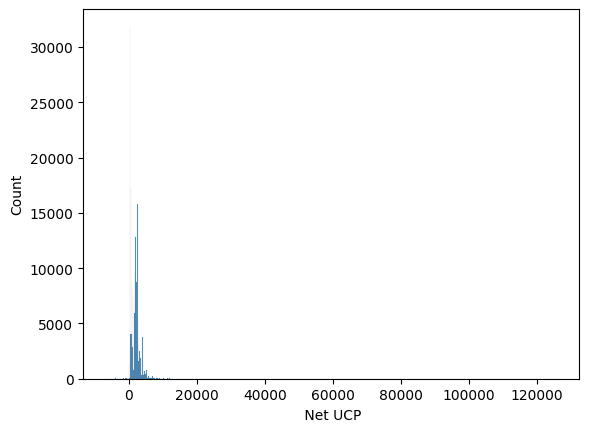

In [12]:
sns.histplot(data=df_23_24_sales_lfs, x=' Net UCP', bins=1000)

Column: MRP
Skewness: 0.32184330685603724


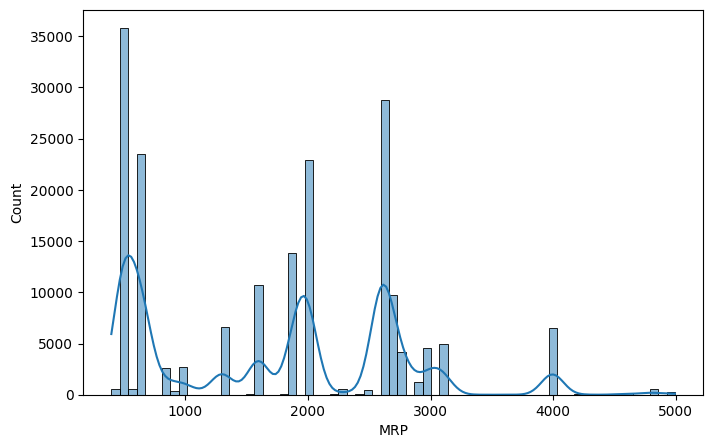

Column: Gross UCP
Skewness: 14.54551915655171


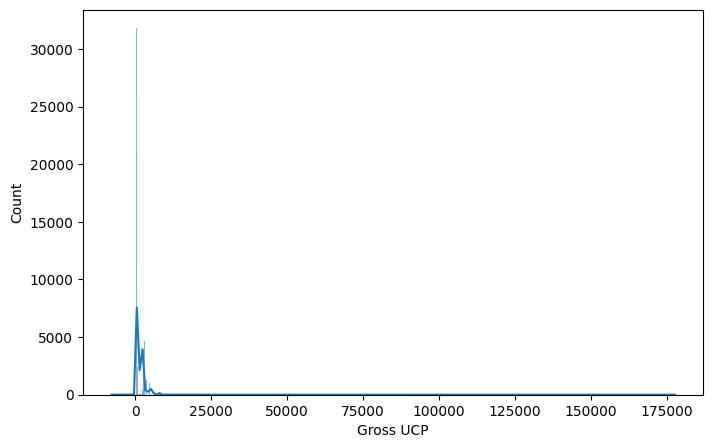

Column:  Net UCP
Skewness: 10.284156342515649


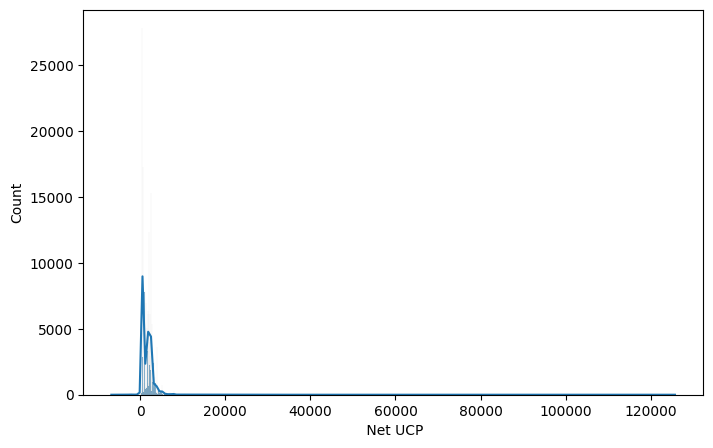

Column: Quantity
Skewness: 24.456072081239682


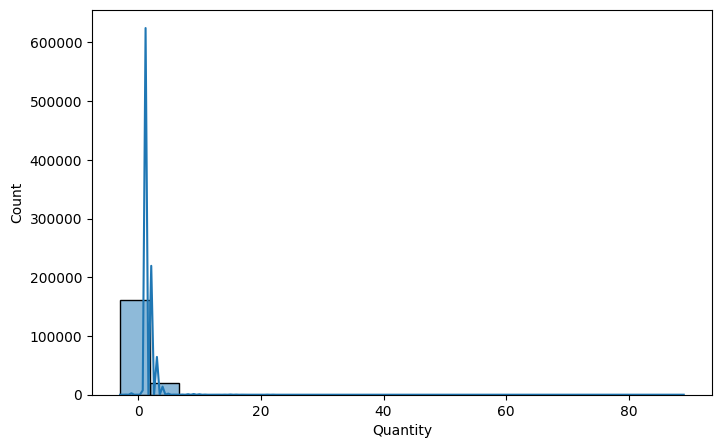

In [13]:
from scipy.stats import skew
columns_to_check = ['MRP', 'Gross UCP', ' Net UCP', 'Quantity']
for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Skewness: {skew(df_23_24_sales_lfs[col])}")
    plt.figure(figsize=(8, 5))
    sns.histplot(df_23_24_sales_lfs[col], kde=True)
    plt.show()

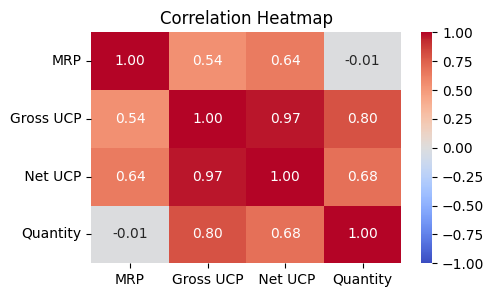

In [14]:
#CORRELATION MATRIX
corr_matrix = df_23_24_sales_lfs[columns_to_check].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

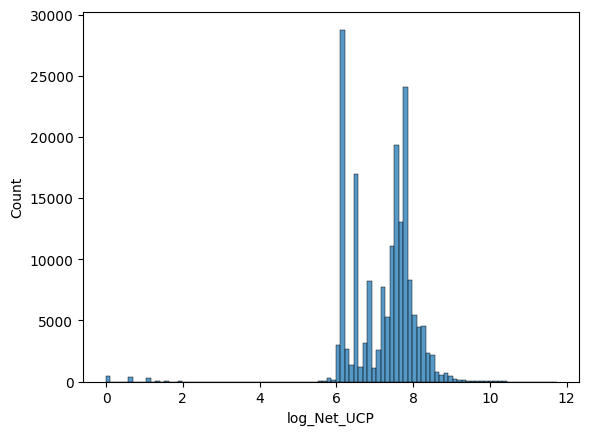

In [15]:
#LOG TRANSFORMATION

df_transformed = df_23_24_sales_lfs.copy()

# Apply log transformation (natural logarithm) on the 'Net UCP' column
df_transformed['log_Net_UCP'] = np.log(df_transformed[' Net UCP'] + 1)  # Add 1 to avoid log of zero

# Generate histogram using the transformed column
sns.histplot(data=df_transformed, x='log_Net_UCP', bins=100)

# Display the plot
plt.show()


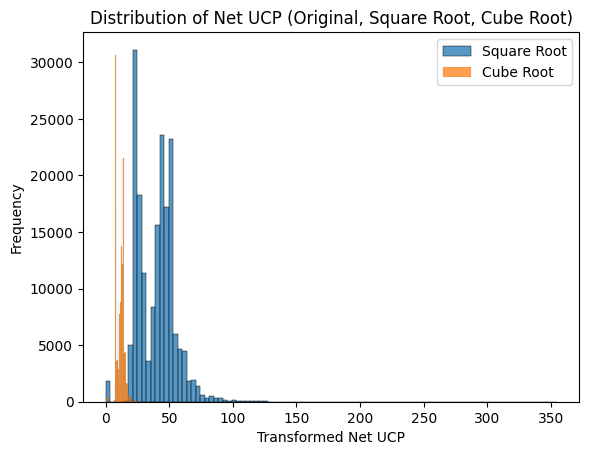

In [16]:
#SQUARE AND CUBE ROOT TRANSFORMATION
import pandas as pd
import seaborn as sns
import numpy as np  # Needed for square root operation

# Assuming 'df_23_24_sales_lfs' is your DataFrame

# Create a copy of the DataFrame for transformations
df_transformed2 = df_transformed.copy()

# Square Root Transformation
# Apply square root on 'Net UCP' (avoiding negative values)
df_transformed2['sqrt_Net_UCP'] = np.sqrt(np.where(df_transformed2[' Net UCP'] >= 0, df_transformed2[' Net UCP'], 0))  

# Generate histogram using square root transformed column
sns.histplot(data=df_transformed2, x='sqrt_Net_UCP', bins=100, label='Square Root')

# Cube Root Transformation
# Apply cube root on 'Net UCP' (avoiding negative values)
df_transformed2['cube_root_Net_UCP'] = np.cbrt(np.where(df_transformed2[' Net UCP'] >= 0, df_transformed2[' Net UCP'], 0))  

# Generate histogram using cube root transformed column
sns.histplot(data=df_transformed2, x='cube_root_Net_UCP', bins=100, label='Cube Root')

# Add labels and title
plt.xlabel('Transformed Net UCP')
plt.ylabel('Frequency')
plt.title('Distribution of Net UCP (Original, Square Root, Cube Root)')
plt.legend()  # Show labels for each histogram

# Display the plot
plt.show()


In [17]:
df_transformed2.head()

Year      Month Month Key QTR Region         Invoice Date  \
42915  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-20 00:00:00   
42916  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-21 00:00:00   
42917  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-20 00:00:00   
42918  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-27 00:00:00   
42919  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-22 00:00:00   

        Material  Quantity Gender Brand  ...  Net UCP Bill to Party City  \
42915  NFFW14PH1       2.0      L    TF  ...   3190.0         VIJAYAWADA   
42916  NEFM14PK1       1.0      G    TF  ...   1995.0         VIJAYAWADA   
42917    FM20PC1       1.0      L    TF  ...   1595.0         VIJAYAWADA   
42918    FM20PC1       1.0      L    TF  ...   1595.0         VIJAYAWADA   
42919  NEFM02PFC       1.0      G    TF  ...   2295.0         VIJAYAWADA   

      ShiptopartyStateCode Channel-2  Billing grp       Varient Name2  \
42915       ANDHRA PRADESH       LFS          LFS        Aqua W 30 ml   
42916       ANDHRA PRADESH       LFS          LFS        Aqua M 90 ml   
42917       ANDHRA PRADESH       LFS          LFS  Tales M Rio 100 ml   
42918       ANDHRA PRADESH       LFS          LFS  Tales M Rio 100 ml   
42919       ANDHRA PRADESH       LFS          LFS        100 M Steele   

           Collection log_Net_UCP sqrt_Net_UCP cube_root_Net_UCP  
42915            Aqua    8.068090    56.480085         14.720760  
42916            Aqua    7.598900    44.665423         12.588702  
42917     Tales 100ml    7.375256    39.937451         11.683875  
42918     Tales 100ml    7.375256    39.937451         11.683875  
42919  Classic 100 ml    7.738924    47.906158         13.190489  

[5 rows x 26 columns]

Column: MRP
Skewness: 0.32184330685603724


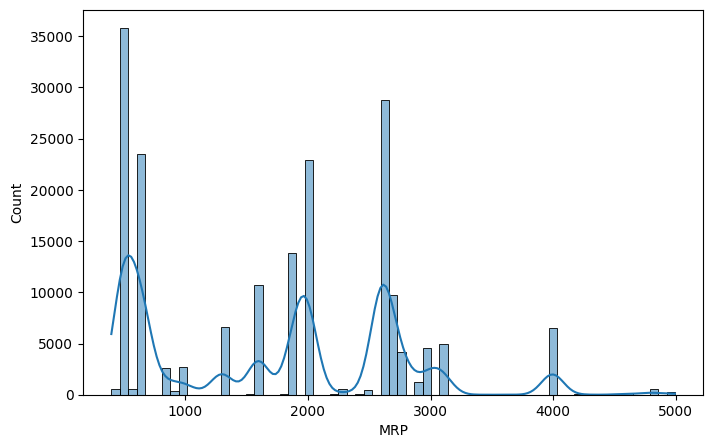

Column: Gross UCP
Skewness: 14.54551915655171


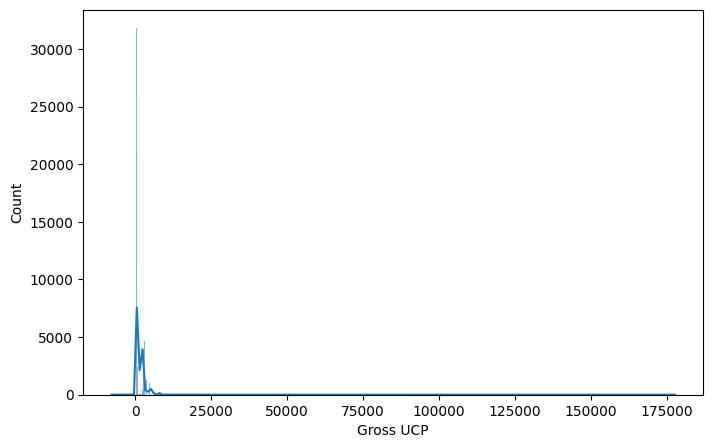

Column:  Net UCP
Skewness: 10.284156342515649


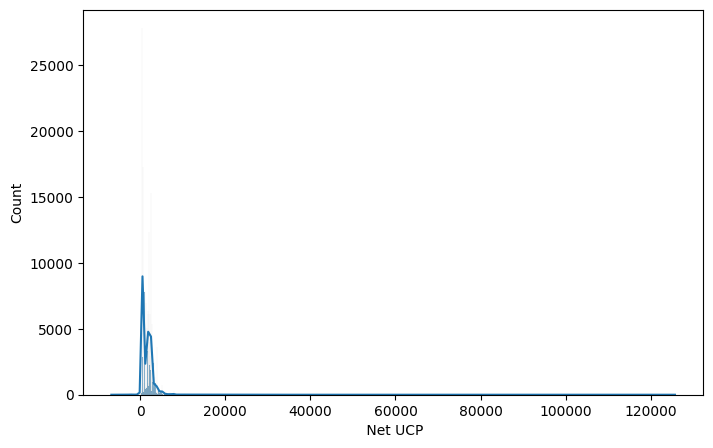

Column: Quantity
Skewness: 24.456072081239682


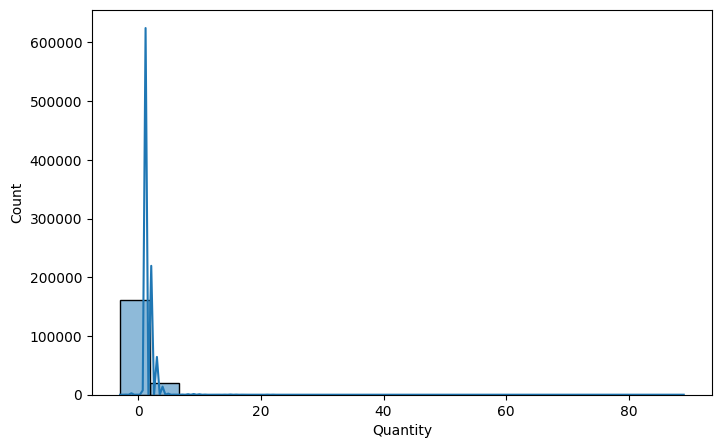

Column: log_Net_UCP
Skewness: nan


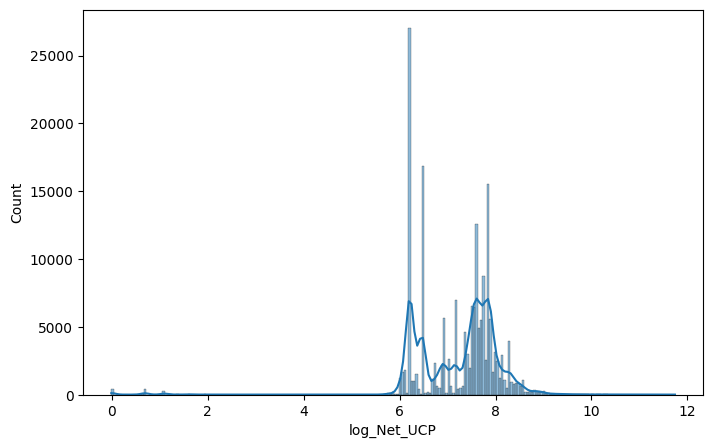

Column: sqrt_Net_UCP
Skewness: 0.9363990968476742


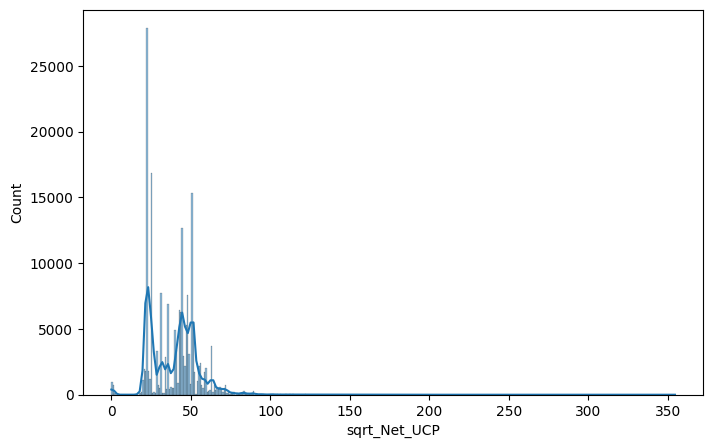

Column: cube_root_Net_UCP
Skewness: 0.03863427698950686


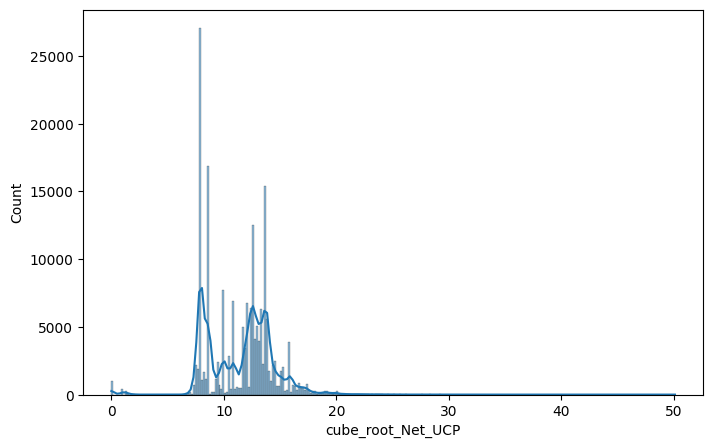

In [18]:
columns_to_check = ['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP','sqrt_Net_UCP', 'cube_root_Net_UCP']
for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Skewness: {skew(df_transformed2[col])}")
    plt.figure(figsize=(8, 5))
    sns.histplot(df_transformed2[col], kde=True)
    plt.show()

In [19]:
#Reason of Skewness == nan
#Missing values identification
df_transformed['log_Net_UCP'].isnull().sum()

541

In [20]:
df_transformed.dropna(subset=['log_Net_UCP'], inplace=True)

In [21]:
df_transformed[np.isinf(df_transformed['log_Net_UCP'])]

Year      Month Month Key QTR Region         Invoice Date  \
647039  2023-24 2023-11-01       Nov  Q3  North  2023-11-11 00:00:00   

         Material  Quantity Gender Brand  ...  MRP Gross UCP  Net UCP  \
647039  NEFW13PD1      -1.0      L    TF  ...  645    -645.0     -1.0   

       Bill to Party City  ShiptopartyStateCode  Channel-2  Billing grp  \
647039              Delhi                 DELHI        LFS          LFS   

       Varient Name2     Collection log_Net_UCP  
647039    20 W Sheer  Classic 20 ml        -inf  

[1 rows x 24 columns]

In [22]:
df_transformed = df_transformed[~np.isinf(df_transformed['log_Net_UCP'])]


In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(df_transformed2[['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP', 'sqrt_Net_UCP', 'cube_root_Net_UCP']])
df_poly = pd.DataFrame(df_poly, columns=poly.get_feature_names_out(['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP', 'sqrt_Net_UCP', 'cube_root_Net_UCP']))
df_poly.head()

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
skewness_values = {}
for col in df_poly.columns:
    col_skewness = skew(df_poly[col])
    skewness_values[col] = col_skewness
    print(f"Column: {col}")
    print(f"Skewness: {col_skewness}")

# Find the minimum skewness value
min_skewness_col = min(skewness_values, key=skewness_values.get)
min_skewness_value = skewness_values[min_skewness_col]

print(f"\nColumn with minimum skewness: {min_skewness_col}")
print(f"Minimum skewness value: {min_skewness_value}")

Column: MRP
Skewness: 0.3219369633750908
Column: Gross UCP
Skewness: 14.802208842698523
Column:  Net UCP
Skewness: 10.558784392349144
Column: Quantity
Skewness: 25.0146962029488
Column: log_Net_UCP
Skewness: -2.5660295893294345
Column: sqrt_Net_UCP
Skewness: 0.9957210144670596
Column: cube_root_Net_UCP
Skewness: 0.18148151822997224
Column: MRP^2
Skewness: 1.5171609739118497
Column: MRP Gross UCP
Skewness: 6.759235982118161
Column: MRP  Net UCP
Skewness: 5.057781195556403
Column: MRP Quantity
Skewness: 14.802208842698523
Column: MRP log_Net_UCP
Skewness: 0.4236389388091627
Column: MRP sqrt_Net_UCP
Skewness: 0.9702746576241522
Column: MRP cube_root_Net_UCP
Skewness: 0.6834334024921334
Column: Gross UCP^2
Skewness: 163.4310737689742
Column: Gross UCP  Net UCP
Skewness: 175.43837766269633
Column: Gross UCP Quantity
Skewness: 142.21016463581245
Column: Gross UCP log_Net_UCP
Skewness: 21.524656806754265
Column: Gross UCP sqrt_Net_UCP
Skewness: 75.55227151958978
Column: Gross UCP cube_root_Ne

In [ ]:
df_transformed2.head()

Year      Month Month Key QTR Region         Invoice Date  \
42915  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-20 00:00:00   
42916  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-21 00:00:00   
42917  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-20 00:00:00   
42918  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-27 00:00:00   
42919  2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-22 00:00:00   

        Material  Quantity Gender Brand  ...  Net UCP Bill to Party City  \
42915  NFFW14PH1       2.0      L    TF  ...   3190.0         VIJAYAWADA   
42916  NEFM14PK1       1.0      G    TF  ...   1995.0         VIJAYAWADA   
42917    FM20PC1       1.0      L    TF  ...   1595.0         VIJAYAWADA   
42918    FM20PC1       1.0      L    TF  ...   1595.0         VIJAYAWADA   
42919  NEFM02PFC       1.0      G    TF  ...   2295.0         VIJAYAWADA   

      ShiptopartyStateCode Channel-2  Billing grp       Varient Name2  \
42915       ANDHRA PRADESH       LFS          LFS        Aqua W 30 ml   
42916       ANDHRA PRADESH       LFS          LFS        Aqua M 90 ml   
42917       ANDHRA PRADESH       LFS          LFS  Tales M Rio 100 ml   
42918       ANDHRA PRADESH       LFS          LFS  Tales M Rio 100 ml   
42919       ANDHRA PRADESH       LFS          LFS        100 M Steele   

           Collection log_Net_UCP sqrt_Net_UCP cube_root_Net_UCP  
42915            Aqua    8.068090    56.480085         14.720760  
42916            Aqua    7.598900    44.665423         12.588702  
42917     Tales 100ml    7.375256    39.937451         11.683875  
42918     Tales 100ml    7.375256    39.937451         11.683875  
42919  Classic 100 ml    7.738924    47.906158         13.190489  

[5 rows x 26 columns]

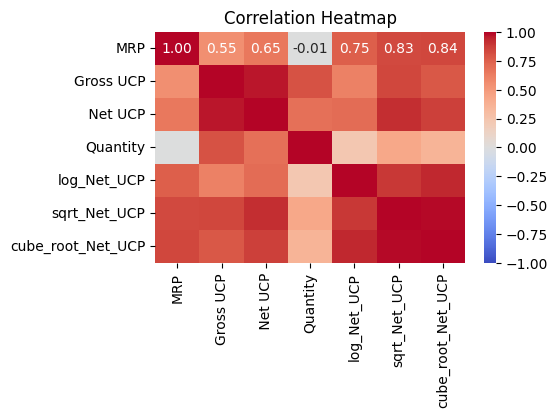

In [ ]:
columns_to_check = ['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP','sqrt_Net_UCP', 'cube_root_Net_UCP']
corr_matrix = df_poly[columns_to_check].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_transformed2['Collection'].value_counts()

Collection
Gift Pack           29468
Classic 100 ml      29254
 Premium Deo        25472
Classic 20 ml       24015
Classic 50 ml       13939
Aqua                12446
 Escapade Deo       10263
Escapade             9772
Nox 100 ml           6488
 Deo Bundle Pack     6372
Noura W 100ml        4975
Nox 20 ml            2655
Noura 20 ml          2586
Tales 100ml          2496
Classic Flanker      1269
Fastrack              345
Skinn Mist             15
 Bohemian               2
Name: count, dtype: int64

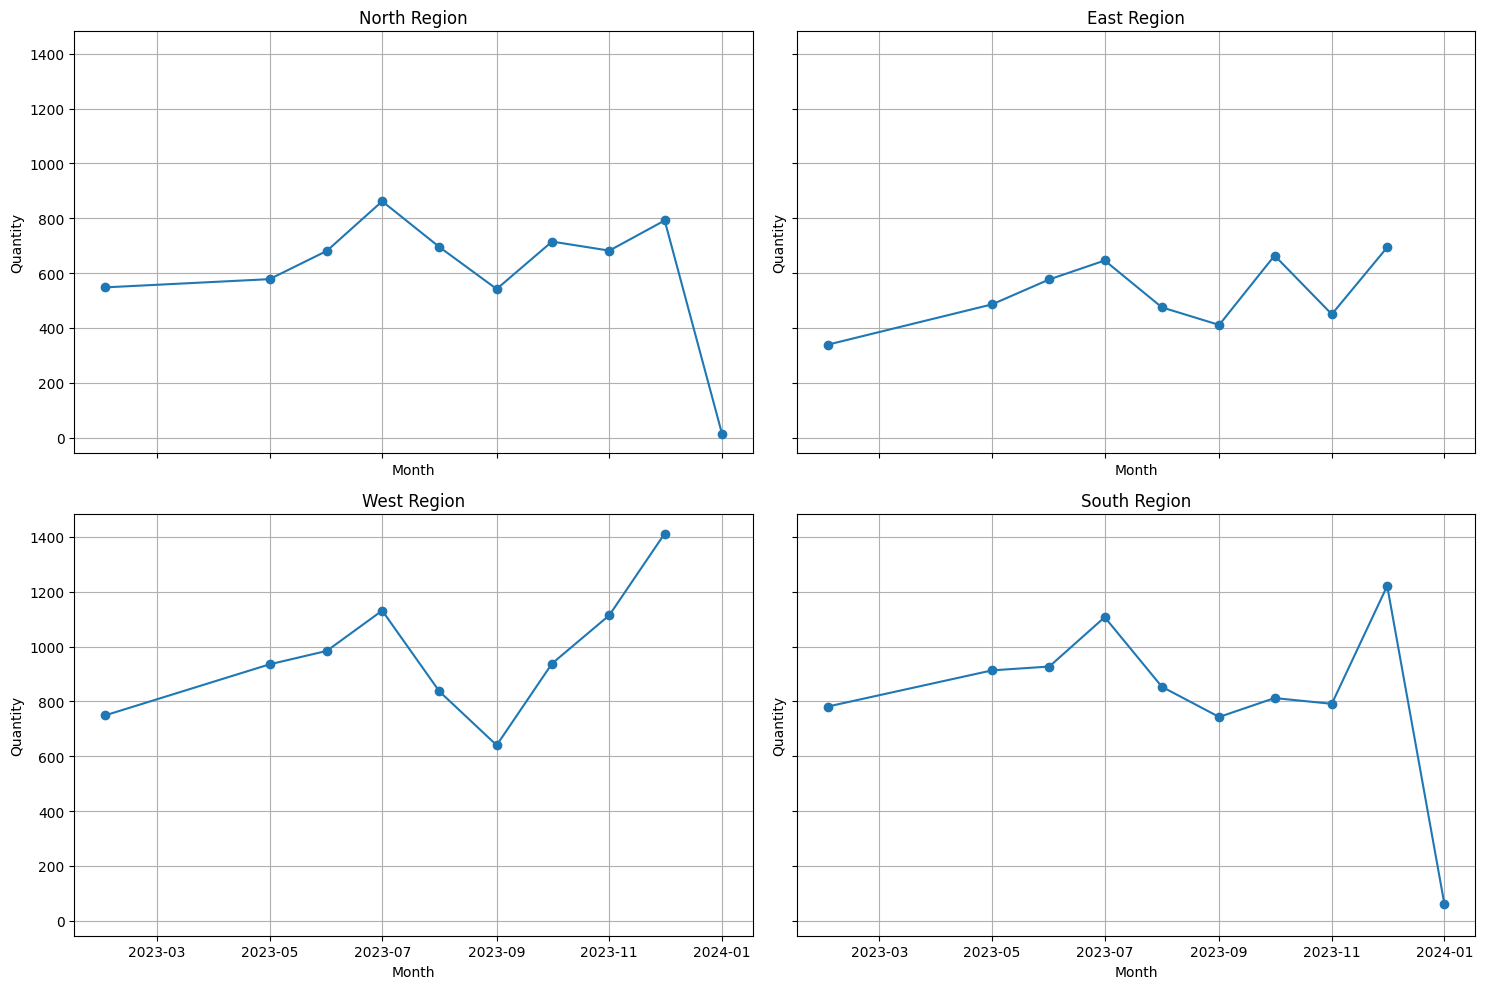

In [ ]:
regions = ["North", "East", "West", "South"]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, region in enumerate(regions):
    df_region = df_transformed2[(df_transformed2['Year'] == '2023-24') & 
                                   (df_transformed2['Region'] == region) & (df_transformed2['Collection']=='Classic 100 ml')]
    df_sales_region = df_region.copy()
    monthly_quantity = df_sales_region.groupby('Month')['Quantity'].sum().reset_index()
    monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
    
    axs[i].plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o')
    axs[i].set_title(f'{region} Region')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Quantity')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

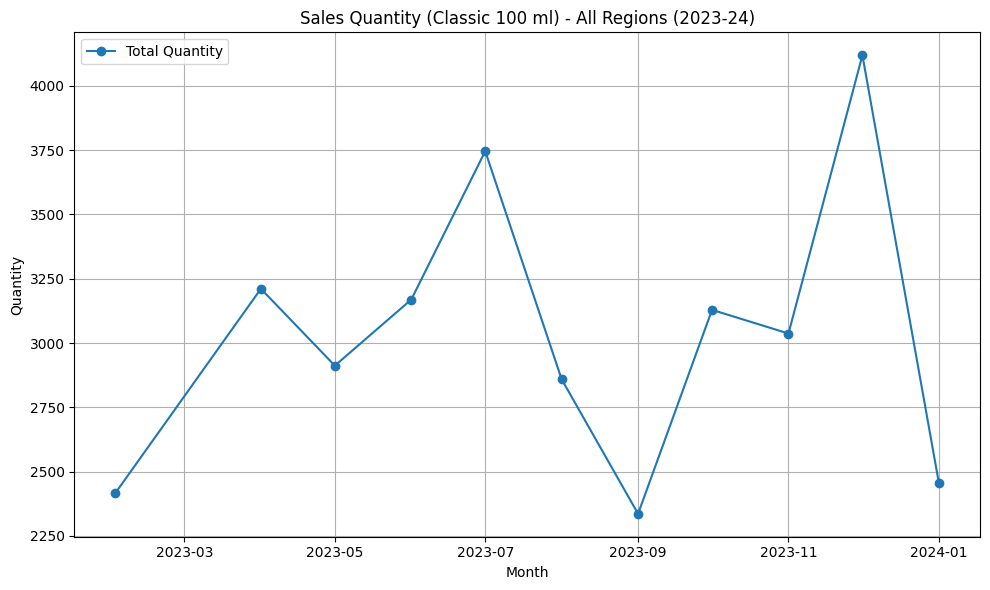

In [ ]:
regions = ["North", "East", "West", "South"]

# Create a figure and single axis
fig, ax = plt.subplots(figsize=(10, 6))

# Combine data for all regions
df_all_regions = df_transformed2[(df_transformed2['Year'] == '2023-24') & (df_transformed2['Collection']=='Classic 100 ml')]
monthly_quantity = df_all_regions.groupby('Month')['Quantity'].sum().reset_index()
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# Plot the combined data
ax.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o', label='Total Quantity')
ax.set_title('Sales Quantity (Classic 100 ml) - All Regions (2023-24)')
ax.set_xlabel('Month')
ax.set_ylabel('Quantity')
ax.grid(True)

# Add legend for clarity
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
monthly_quantity_1st_day

Month  Quantity
0  2023-02-01    2417.0
1  2023-04-01    3211.0
2  2023-05-01    2912.0
3  2023-06-01    3169.0
4  2023-07-01    3746.0
5  2023-08-01    2859.0
6  2023-09-01    2336.0
8  2023-10-01    3129.0
10 2023-11-01    3037.0
13 2023-12-01    4119.0
18 2024-01-01    2457.0

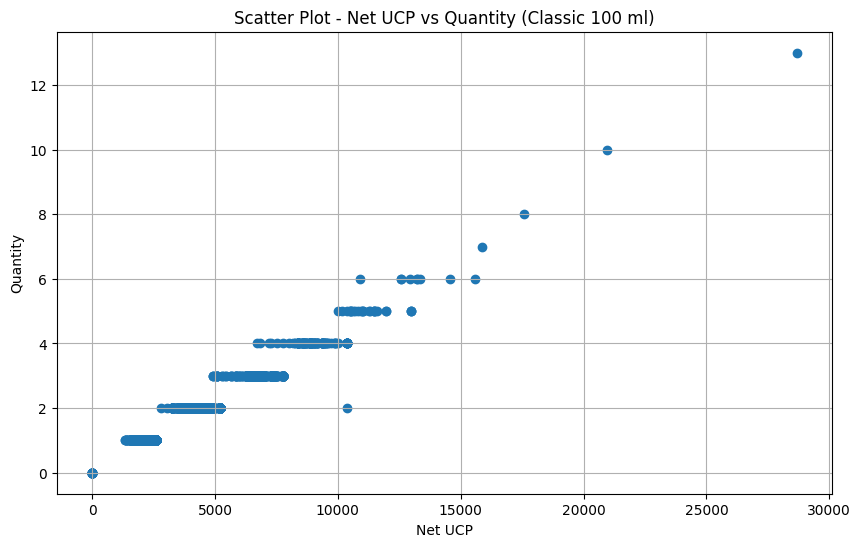

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for Classic 100 ml collection for the year 2023-24
df_classic_100ml = df_transformed2[(df_transformed2['Year'] == '2023-24') & (df_transformed2['Collection']=='Classic 100 ml')]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_classic_100ml[' Net UCP'], df_classic_100ml['Quantity'], marker='o')
plt.title('Scatter Plot - Net UCP vs Quantity (Classic 100 ml)')
plt.xlabel('Net UCP')
plt.ylabel('Quantity')
plt.grid(True)

# Display the plot
plt.show()


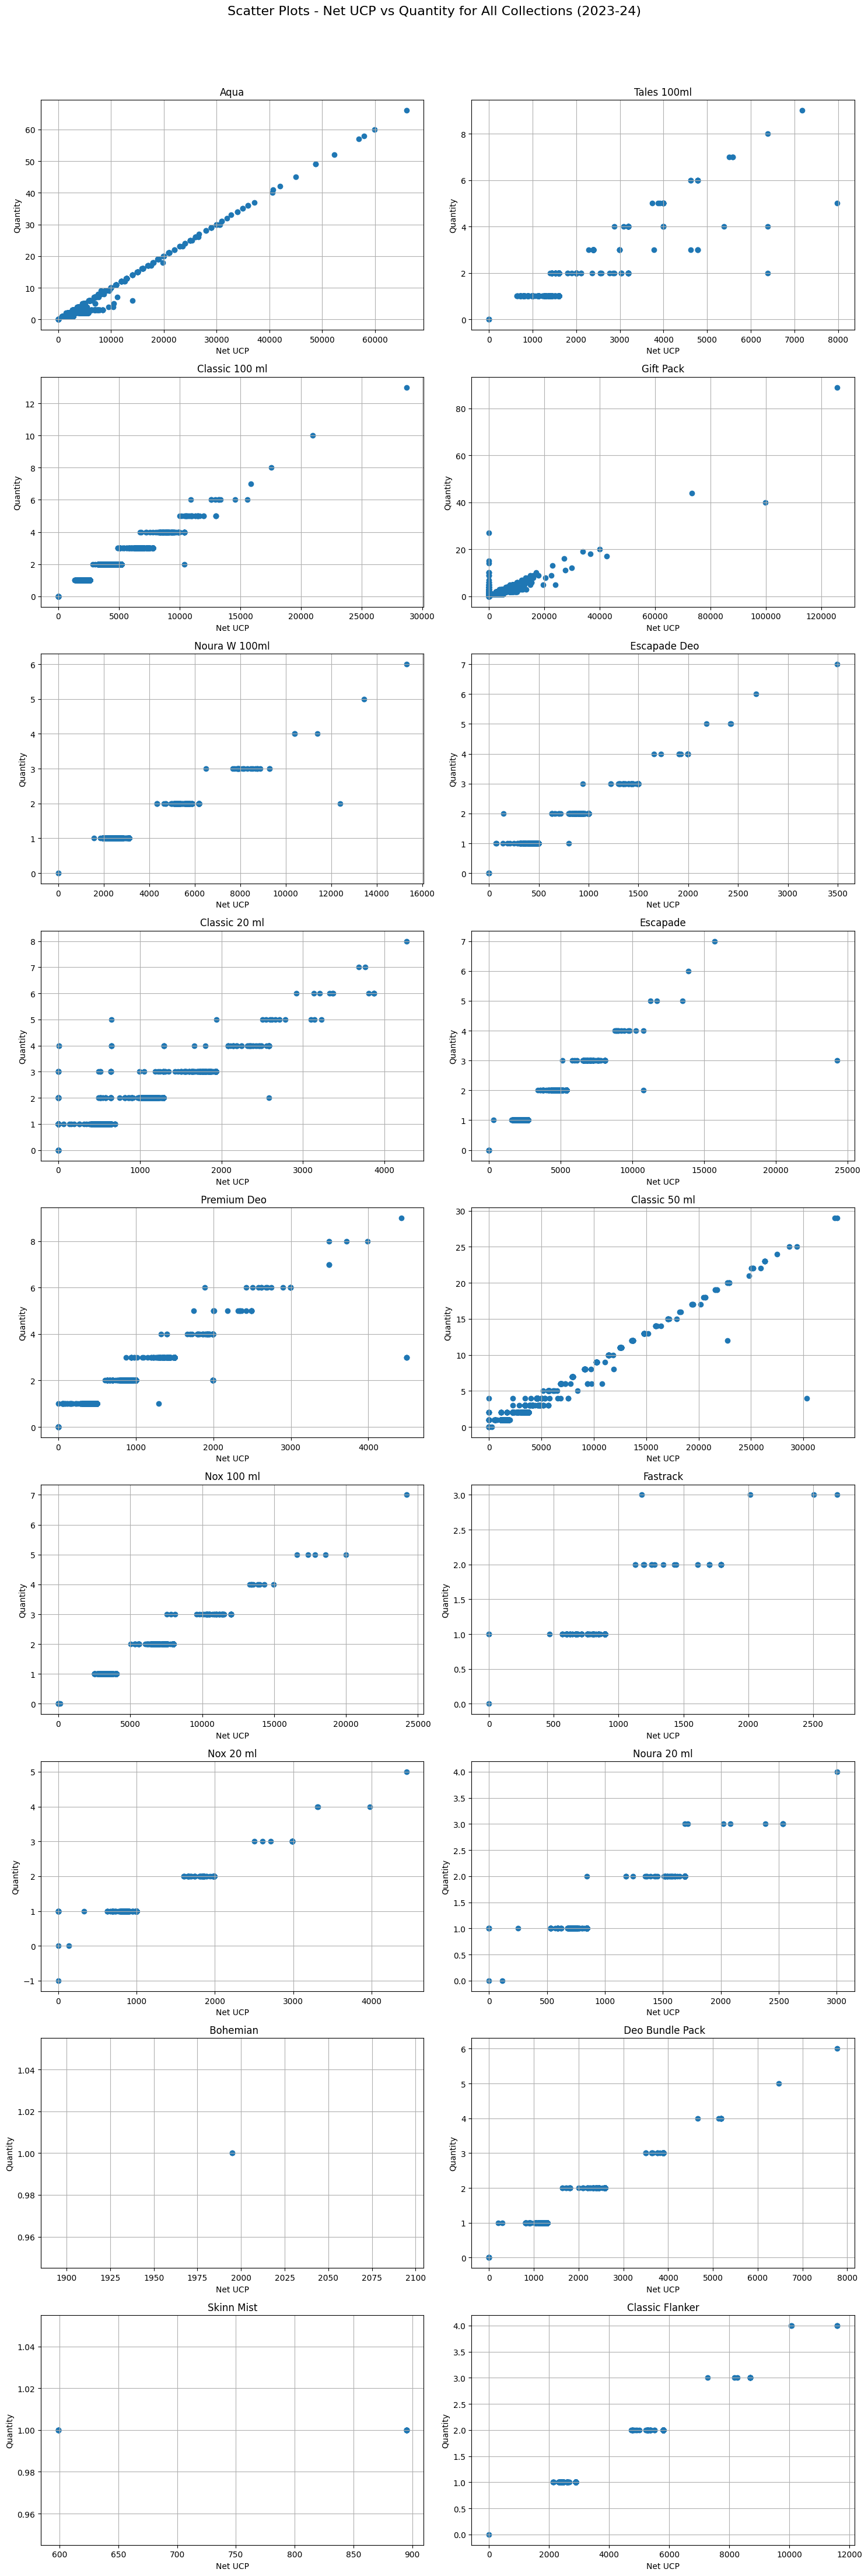

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Get unique collections
collections = df_2023_24['Collection'].unique()

# Create subplots
num_collections = len(collections)
num_rows = (num_collections + 1) // 2  # Adjust the number of rows for the subplot grid

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
fig.suptitle('Scatter Plots - Net UCP vs Quantity for All Collections (2023-24)', fontsize=16)

for i, collection in enumerate(collections):
    ax = axs[i // 2, i % 2]  # Determine subplot position
    df_collection = df_2023_24[df_2023_24['Collection'] == collection]
    ax.scatter(df_collection[' Net UCP'], df_collection['Quantity'], marker='o')
    ax.set_title(f'{collection}')
    ax.set_xlabel('Net UCP')
    ax.set_ylabel('Quantity')
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


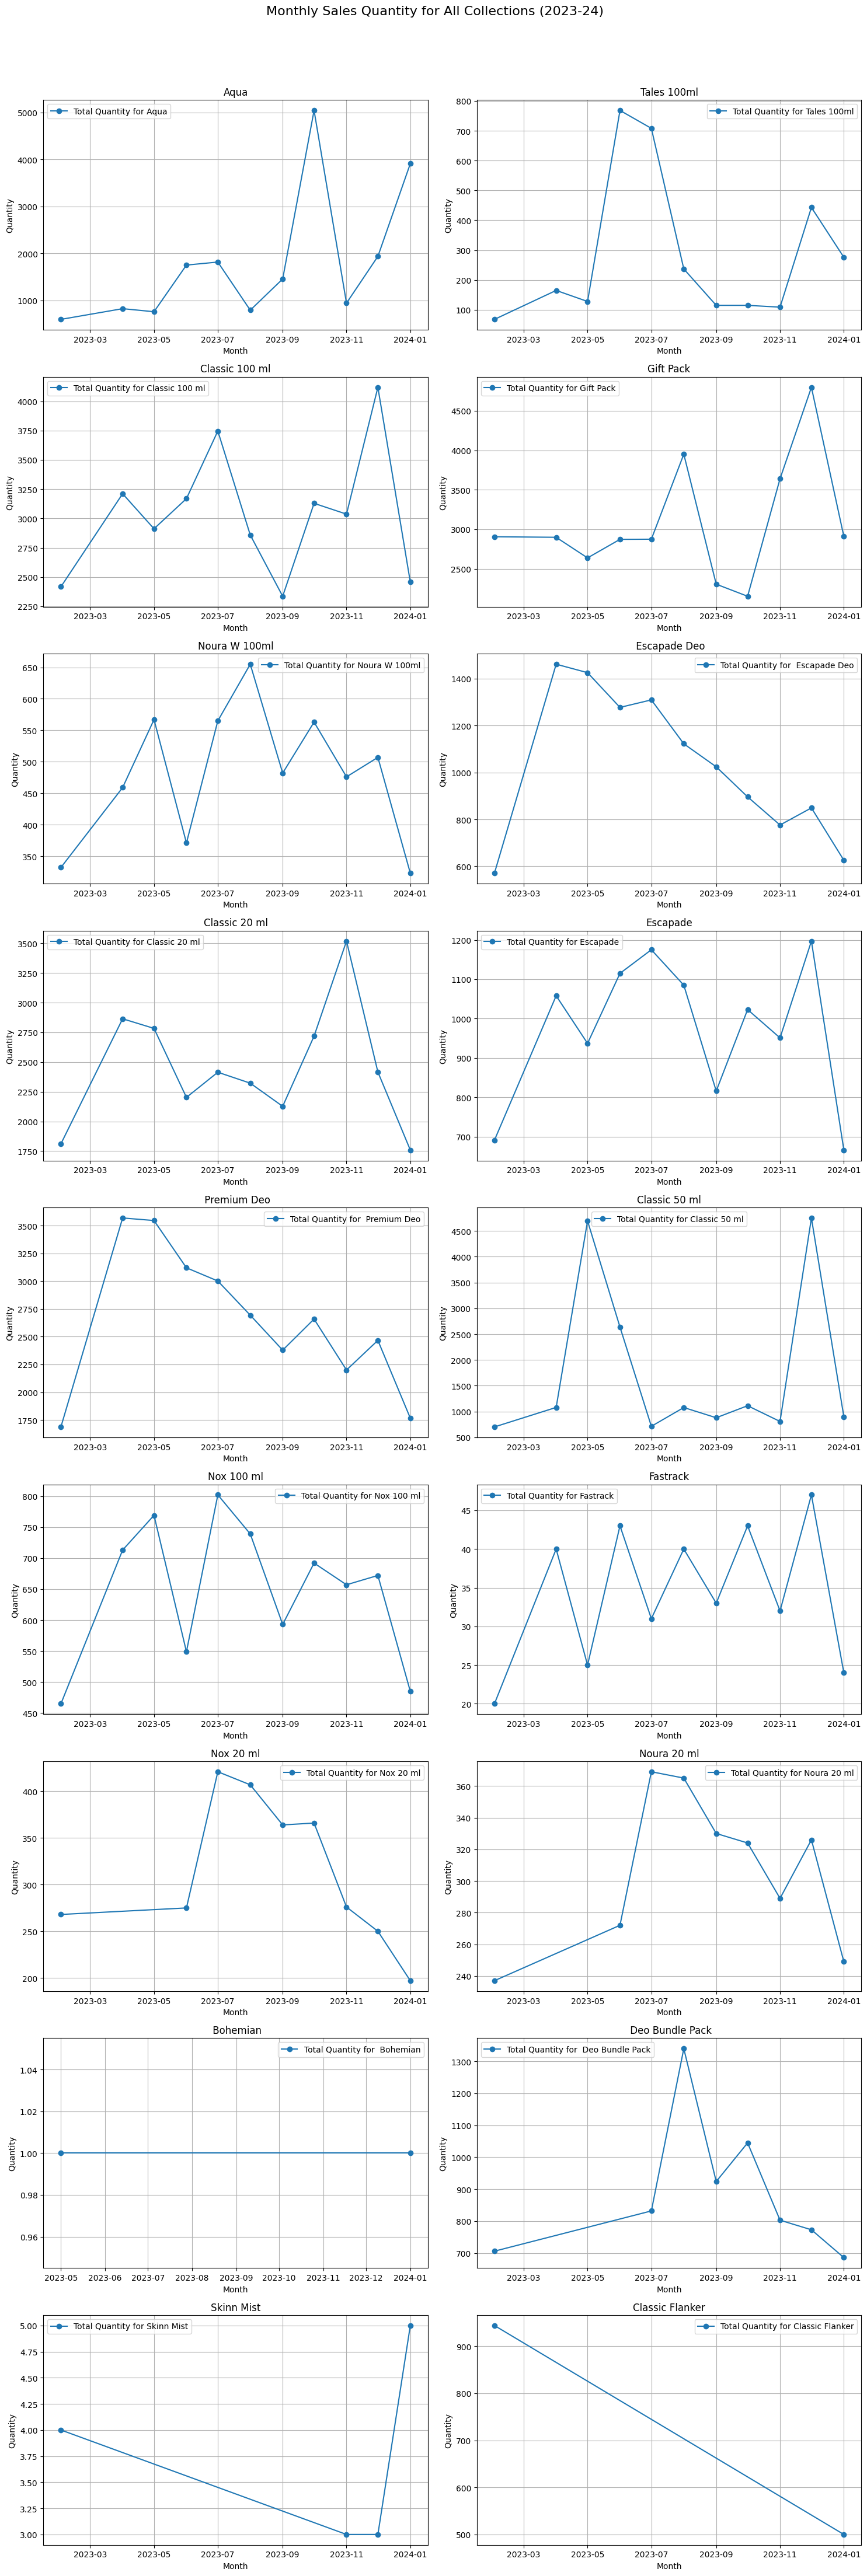

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Get unique collections
collections = df_2023_24['Collection'].unique()

# Create subplots
num_collections = len(collections)
num_rows = (num_collections + 1) // 2  # Adjust the number of rows for the subplot grid

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
fig.suptitle('Monthly Sales Quantity for All Collections (2023-24)', fontsize=16)

for i, collection in enumerate(collections):
    ax = axs[i // 2, i % 2]  # Determine subplot position
    df_collection = df_2023_24[df_2023_24['Collection'] == collection]
    
    # Group by month and sum the quantities
    monthly_quantity = df_collection.groupby('Month')['Quantity'].sum().reset_index()
    monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
    
    # Plot the monthly quantities
    ax.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o', label=f'Total Quantity for {collection}')
    ax.set_title(f'{collection}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity')
    ax.grid(True)
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


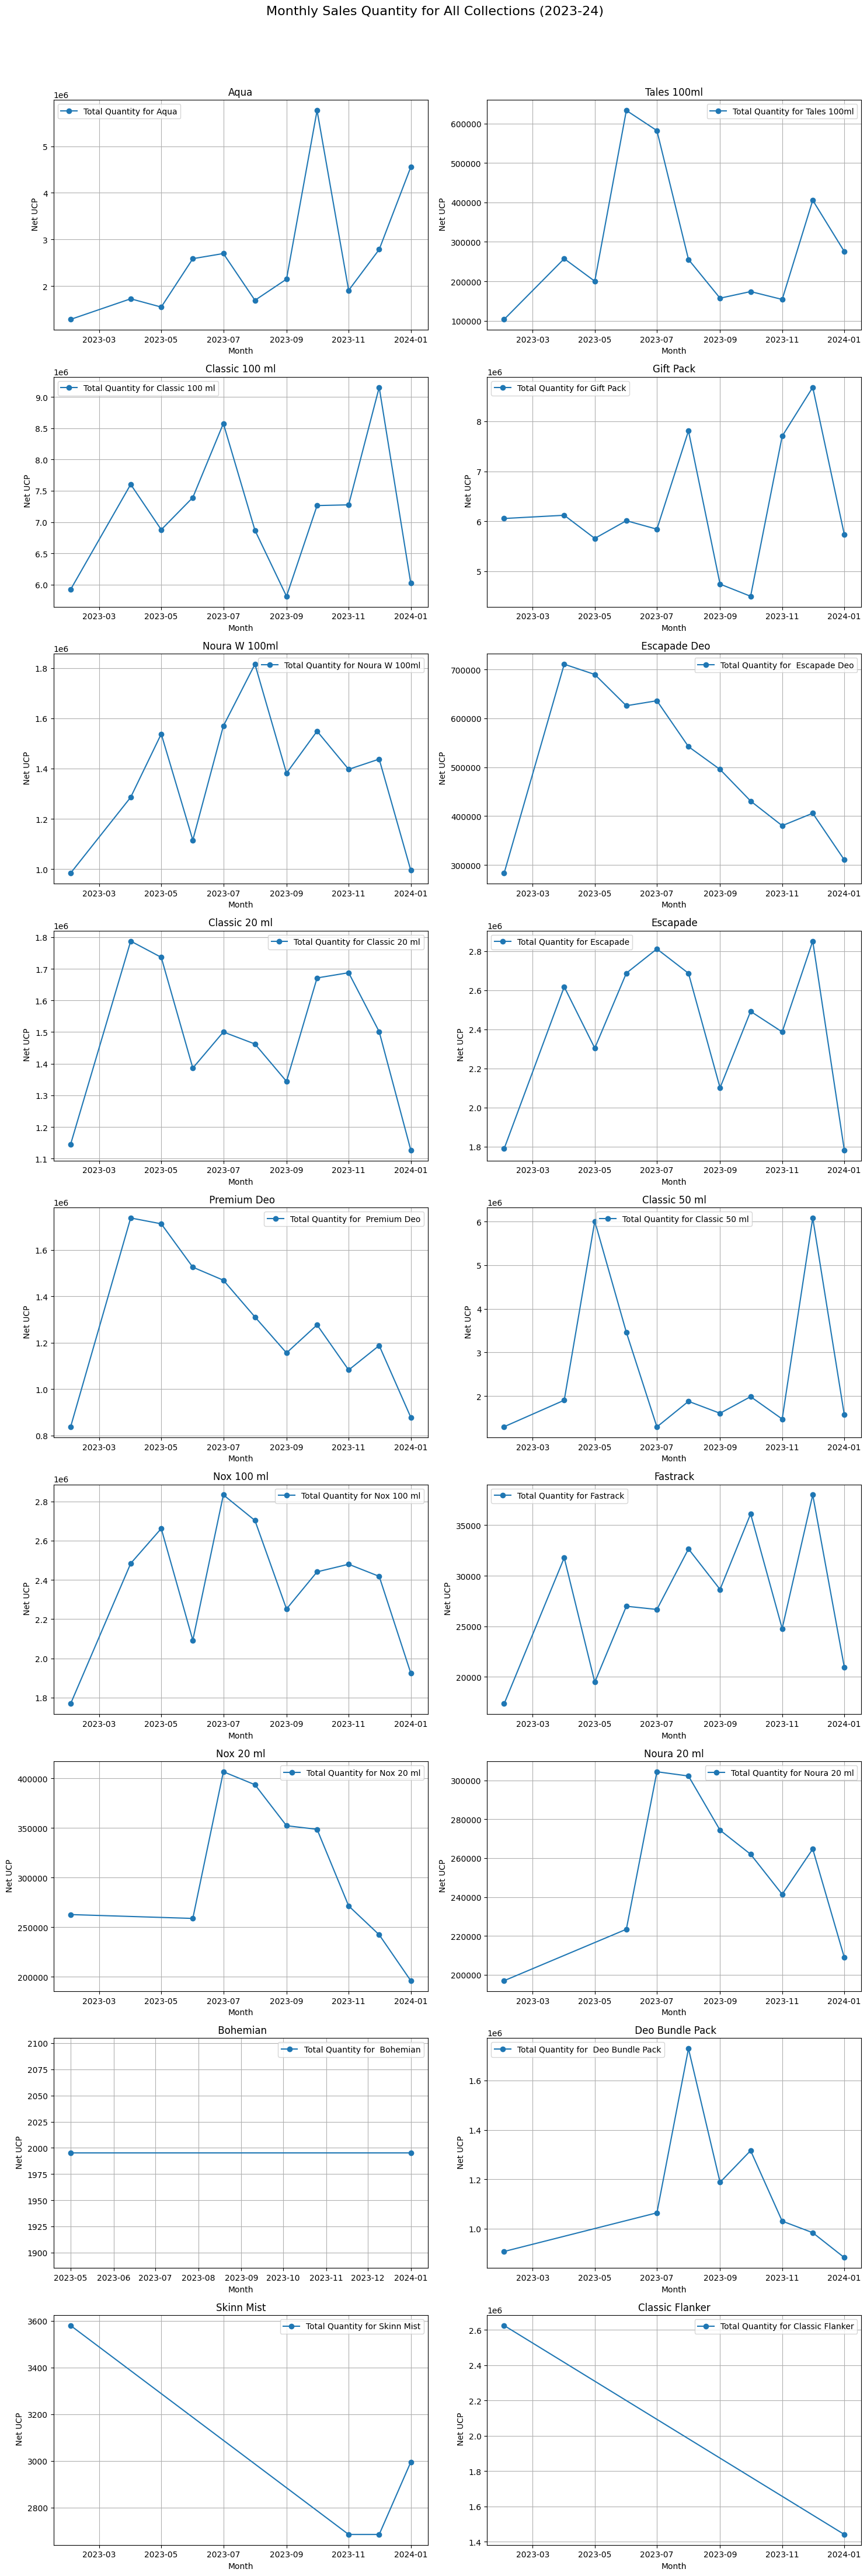

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Get unique collections
collections = df_2023_24['Collection'].unique()

# Create subplots
num_collections = len(collections)
num_rows = (num_collections + 1) // 2  # Adjust the number of rows for the subplot grid

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
fig.suptitle('Monthly Sales Quantity for All Collections (2023-24)', fontsize=16)

for i, collection in enumerate(collections):
    ax = axs[i // 2, i % 2]  # Determine subplot position
    df_collection = df_2023_24[df_2023_24['Collection'] == collection]
    
    # Group by month and sum the quantities
    monthly_quantity = df_collection.groupby('Month')[' Net UCP'].sum().reset_index()
    monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
    
    # Plot the monthly quantities
    ax.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day[' Net UCP'], marker='o', label=f'Total Quantity for {collection}')
    ax.set_title(f'{collection}')
    ax.set_xlabel('Month')
    ax.set_ylabel(' Net UCP')
    ax.grid(True)
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
#EXPONENTIAL SMOOTHING IMPLEMENTATION USING LIBRARY
from statsmodels.tsa.holtwinters import ExponentialSmoothing
def get_exponential_smoothing_forecast(data, alpha=0.3):
  """
  This function takes a time series data (e.g., monthly sales) and alpha value
  (between 0 and 1) and returns the exponentially smoothed forecast.

  Args:
      data (pandas.Series): Time series data.
      alpha (float): Smoothing parameter (default: 0.3).

  Returns:
      pandas.Series: Exponentially smoothed forecast.
  """
  model = ExponentialSmoothing(data, trend='additive', seasonal='add', seasonal_periods=2)  # Adjust seasonality if needed
  model_fit = model.fit(optimized=False)
  forecast = model_fit.forecast(len(data))
  return forecast


for i, collection in enumerate(collections):
  ax = axs[i // 2, i % 2]  # Determine subplot position
  df_collection = df_2023_24[df_2023_24['Collection'] == collection]
  
  # Group by month and sum the quantities
  monthly_quantity = df_collection.groupby('Month')[' Net UCP'].sum().reset_index()
  monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
  
  # Plot the monthly quantities
  ax.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day[' Net UCP'], marker='o', label=f'Total Quantity for {collection}')
  
  # Get forecast
  forecast = get_exponential_smoothing_forecast(monthly_quantity_1st_day[' Net UCP'])
  ax.plot(monthly_quantity_1st_day['Month'], forecast, marker='x', label=f'Forecast for {collection}')
  
  ax.set_title(f'{collection}')
  ax.set_xlabel('Month')
  ax.set_ylabel(' Net UCP')
  ax.grid(True)
  ax.legend()


C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

Coefficients: [1018.08130014]
Intercept: 525.2153671066864


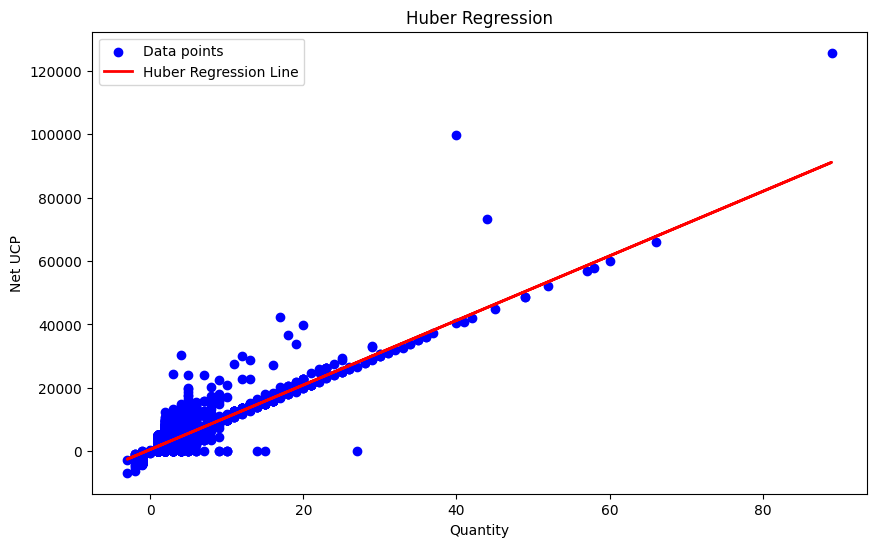

In [ ]:
import pandas as pd
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df_23_24_sales_lfs' is your DataFrame containing features (X) and target variable (y)

# Separate features (X) and target variable (y)
X = df_23_24_sales_lfs[['Quantity']]  # Selecting 'Quantity' as the feature
y = df_23_24_sales_lfs[' Net UCP']    # Selecting 'Net UCP' as the target variable

# Create a HuberRegressor object (commonly used robust regression model)
huber_reg = HuberRegressor(epsilon=1.35) 

# Fit the model on your data
huber_reg.fit(X, y)

# Optional: Get predictions or perform other model operations with huber_reg
predictions = huber_reg.predict(X)

# Print the coefficients of the fitted model
print("Coefficients:", huber_reg.coef_)
# Print the intercept of the fitted model
print("Intercept:", huber_reg.intercept_)

# Plotting the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', linewidth=2, label='Huber Regression Line')
plt.xlabel('Quantity')
plt.ylabel('Net UCP')
plt.title('Huber Regression')
plt.legend()
plt.show()


(array([1.80358e+05, 1.90400e+03, 8.50000e+01, 1.70000e+01, 5.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ -6785.   ,   6464.009,  19713.018,  32962.027,  46211.036,
         59460.045,  72709.054,  85958.063,  99207.072, 112456.081,
        125705.09 ]),
 <BarContainer object of 10 artists>)

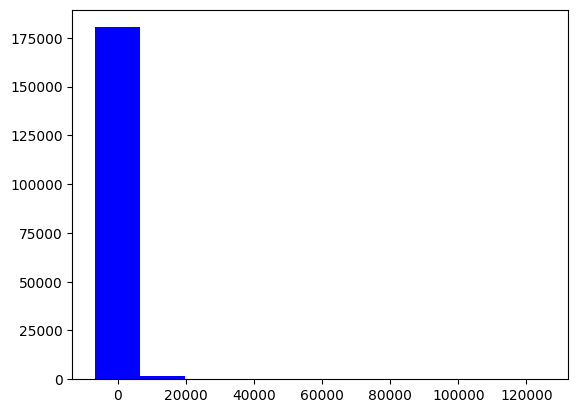

In [ ]:
plt.hist(df_23_24_sales_lfs[' Net UCP'], bins=10, color='blue', alpha=1)

In [ ]:
df_23_24_sales_lfs[' Net UCP'].value_counts()

 Net UCP
499.00     26774
645.00     16756
2595.00    12055
1995.00    11151
1795.50     5758
           ...  
7030.50        1
4535.35        1
1737.91        1
2541.23        1
7602.88        1
Name: count, Length: 7439, dtype: int64

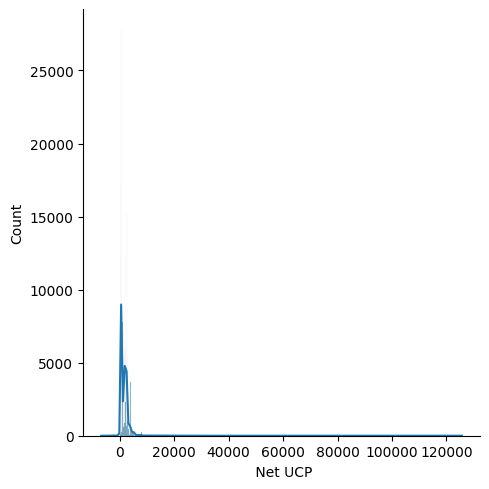

In [ ]:
sns.displot(df_23_24_sales_lfs[' Net UCP'], kde=True)

<Axes: xlabel=' Net UCP'>

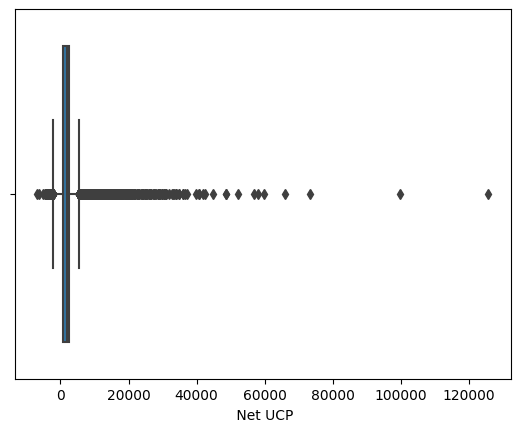

In [ ]:
sns.boxplot(data=df_23_24_sales_lfs, x=' Net UCP')

In [ ]:
df_23_24_sales_lfs[df_23_24_sales_lfs[' Net UCP'] < 0].shape
#These might indicates the return or refunds 

(543, 23)

In [ ]:
df_23_24_sales_lfs[(df_23_24_sales_lfs[' Net UCP'] < 0) & (df_23_24_sales_lfs['Quantity'] >= 0)].shape

(10, 23)

In [ ]:
df_23_24_sales_lfs[(df_23_24_sales_lfs[' Net UCP'] < 0) & (df_23_24_sales_lfs['Quantity'] >= 0)].head()

Year      Month Month Key QTR Region         Invoice Date  \
53626   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-30 00:00:00   
56352   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-30 00:00:00   
321424  2023-24 2023-07-01       Jul  Q2   West  2023-07-16 00:00:00   
467528  2023-24 2023-09-01       Sep  Q2   West  2023-09-06 00:00:00   
545593  2023-24 2023-10-01       Oct  Q3   East  2023-10-15 00:00:00   

         Material  Quantity Gender Brand  ...           Bill to Party Name  \
53626   NFFW05PG2       0.0      L    TF  ...            LS-VR Mall-Nagpur   
56352     FW22PC1       0.0      L    TF  ...            LS-VR Mall-Nagpur   
321424  NFFW03PFC       0.0      L    TF  ...  Phoenix Market City-LS-PUNE   
467528  NFFW02PFL       0.0      L    TF  ...         Ls Seasons Mall-Pune   
545593  NFFW04PFC       0.0      L    TF  ...        PT-SOUTH CITY-KOLKATA   

         MRP Gross UCP  Net UCP  Bill to Party City  ShiptopartyStateCode  \
53626   1995       0.0   -44.08              NAGPUR            MAHARASTRA   
56352   3095       0.0   -68.39              NAGPUR            MAHARASTRA   
321424  2595       0.0  -259.50                Pune            MAHARASTRA   
467528  1895       0.0  -189.50                Pune            MAHARASTRA   
545593  2595       0.0  -709.50             Kolkata           WEST BENGAL   

        Channel-2 Billing grp        Varient Name2      Collection  
53626         LFS         LFS   Mini 25 ml W (C,S)       Gift Pack  
56352         LFS         LFS  Noura W Iris 100 ml   Noura W 100ml  
321424        LFS         LFS           100 W Nude  Classic 100 ml  
467528        LFS         LFS         50 W Celeste   Classic 50 ml  
545593        LFS         LFS          100 W Sheer  Classic 100 ml  

[5 rows x 23 columns]

In [ ]:
df_23_24_sales_lfs[df_23_24_sales_lfs[' Net UCP'] < 0][[' Net UCP', 'Gross UCP']]
# df_23_24_sales_lfs[(df_23_24_sales_lfs['Gross UCP'] > df_23_24_sales_lfs[' Net UCP']][[' Net UCP', 'Gross UCP']

Net UCP  Gross UCP
43974   -2306.03    -2595.0
44045    -556.40     -645.0
44048   -2583.60    -2995.0
44097    -645.00     -645.0
44294   -2681.23    -3095.0
...          ...        ...
938859  -1995.00    -1995.0
939700  -1995.00    -1995.0
939912  -1404.66    -1595.0
940415   -998.00     -998.0
940498  -2595.00    -2595.0

[543 rows x 2 columns]

In [ ]:
df_23_24_sales_lfs[(df_23_24_sales_lfs[' Net UCP'] < 0) & (df_23_24_sales_lfs['Gross UCP'] > df_23_24_sales_lfs[' Net UCP'])][[' Net UCP', 'Gross UCP']].sample(12)

Net UCP  Gross UCP
781280  -6380.00    -3190.0
467528   -189.50        0.0
768953   -179.23        0.0
641896     -0.01      645.0
56352     -68.39        0.0
321424   -259.50        0.0
53626     -44.08        0.0
48570   -4000.00    -3995.0
545593   -709.50        0.0
932175    -87.91        0.0
552348   -457.94        0.0
930027    -84.64        0.0

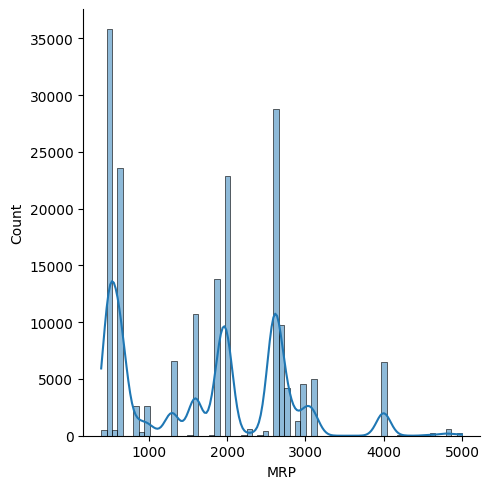

In [ ]:
sns.displot(df_23_24_sales_lfs['MRP'], kde=True)

(array([6.2975e+04, 9.4130e+03, 1.0950e+04, 3.6824e+04, 2.9837e+04,
        2.4734e+04, 0.0000e+00, 6.5250e+03, 4.1000e+01, 1.0750e+03]),
 array([ 395.,  855., 1315., 1775., 2235., 2695., 3155., 3615., 4075.,
        4535., 4995.]),
 <BarContainer object of 10 artists>)

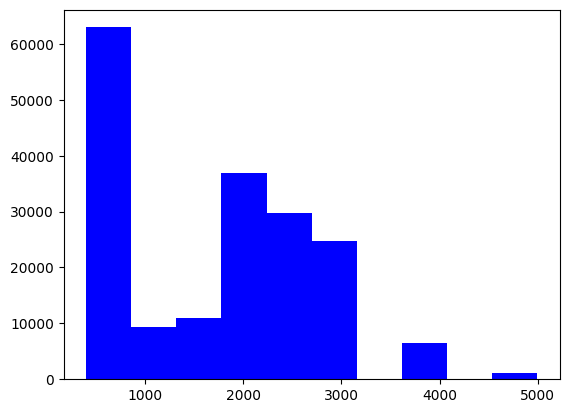

In [ ]:
plt.hist(df_23_24_sales_lfs['MRP'], bins=10, color='blue', alpha=1)

In [ ]:
df_23_24_sales_lfs['Franchisee store'].nunique()

342

In [ ]:
df_23_24_sales_lfs['Channel'].value_counts()
#Here the 'ss' might indicate the small scale values as well or might have the anomanly in the data entry as well

Channel
SS    88915
LS    70208
PT    14569
CT     7917
LL      655
AZ       69
ss       41
Name: count, dtype: int64

<Axes: xlabel='Channel', ylabel='count'>

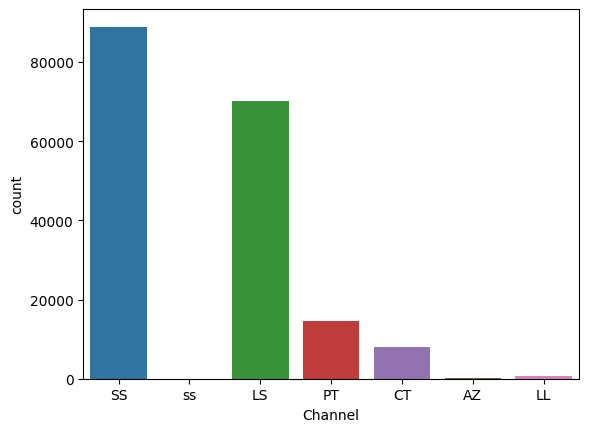

In [ ]:
sns.countplot(data=df_23_24_sales_lfs, x='Channel')

<Axes: xlabel='Quantity'>

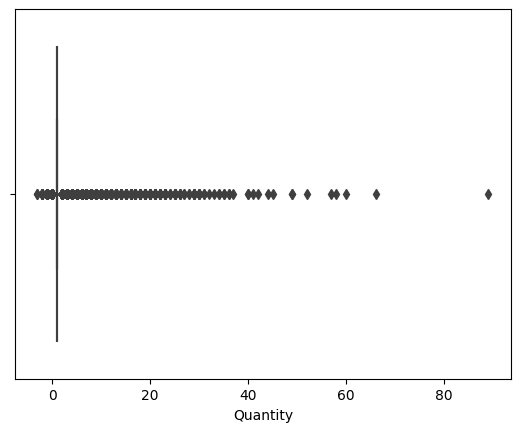

In [ ]:
sns.boxplot(data=df_23_24_sales_lfs, x='Quantity')

In [ ]:
df_23_24_sales_lfs.nlargest(30, 'Quantity')
#Bulk order by the customers which might not play the 

Year      Month Month Key QTR Region         Invoice Date  \
641708  2023-24 2023-11-01       Nov  Q3   West  2023-11-07 00:00:00   
560619  2023-24 2023-10-01       Oct  Q3   East  2023-10-02 00:00:00   
560715  2023-24 2023-10-01       Oct  Q3   East  2023-10-15 00:00:00   
560603  2023-24 2023-10-01       Oct  Q3   East  2023-10-07 00:00:00   
560613  2023-24 2023-10-01       Oct  Q3   East  2023-10-08 00:00:00   
475285  2023-24 2023-09-01       Sep  Q2   East  2023-09-24 00:00:00   
475281  2023-24 2023-09-01       Sep  Q2   East  2023-09-30 00:00:00   
560610  2023-24 2023-10-01       Oct  Q3   East  2023-10-01 00:00:00   
560617  2023-24 2023-10-01       Oct  Q3   East  2023-10-15 00:00:00   
646284  2023-24 2023-11-01       Nov  Q3   West  2023-11-11 00:00:00   
560032  2023-24 2023-10-01       Oct  Q3   East  2023-10-02 00:00:00   
560711  2023-24 2023-10-01       Oct  Q3   East  2023-10-08 00:00:00   
46322   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-11 00:00:00   
560720  2023-24 2023-10-01       Oct  Q3   East  2023-10-02 00:00:00   
560705  2023-24 2023-10-01       Oct  Q3   East  2023-10-01 00:00:00   
475323  2023-24 2023-09-01       Sep  Q2   East  2023-09-24 00:00:00   
560175  2023-24 2023-10-01       Oct  Q3   East  2023-10-02 00:00:00   
560023  2023-24 2023-10-01       Oct  Q3   East  2023-10-08 00:00:00   
560729  2023-24 2023-10-01       Oct  Q3   East  2023-10-18 00:00:00   
475283  2023-24 2023-09-01       Sep  Q2   East  2023-09-23 00:00:00   
559095  2023-24 2023-10-01       Oct  Q3   East  2023-10-08 00:00:00   
560026  2023-24 2023-10-01       Oct  Q3   East  2023-10-07 00:00:00   
560714  2023-24 2023-10-01       Oct  Q3   East  2023-10-07 00:00:00   
560606  2023-24 2023-10-01       Oct  Q3   East  2023-10-10 00:00:00   
560611  2023-24 2023-10-01       Oct  Q3   East  2023-10-14 00:00:00   
475279  2023-24 2023-09-01       Sep  Q2   East  2023-09-28 00:00:00   
475325  2023-24 2023-09-01       Sep  Q2   East  2023-09-26 00:00:00   
560020  2023-24 2023-10-01       Oct  Q3   East  2023-10-01 00:00:00   
560704  2023-24 2023-10-01       Oct  Q3   East  2023-10-14 00:00:00   
560726  2023-24 2023-10-01       Oct  Q3   East  2023-10-17 00:00:00   

          Material  Quantity Gender Brand  ...            Bill to Party Name  \
641708   NFFM01CL2      89.0      G    TF  ...           CT-Vadodara Central   
560619   NFFM14PH1      66.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560715   NFFW14PH1      60.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560603   NFFM14PH1      58.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560613   NFFM14PH1      57.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
475285   NFFM14PH1      52.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
475281   NFFM14PH1      49.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560610   NFFM14PH1      49.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560617   NFFM14PH1      45.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
646284   NFFP01PG2      44.0      P    TF  ...               Runwal - Mulund   
560032   NFFM14PH1      42.0      G    TF  ...     115-SSL-SALT LAKE KOLKATA   
560711   NFFW14PH1      41.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
46322   NFFP01PGFL      40.0      P    TF  ...  223-SSL - CHINCHWAD PUNE 223   
560720   NFFW14PH1      40.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560705   NFFW14PH1      37.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
475323   NFFW14PH1      36.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560175   NFFW14PH1      36.0      L    TF  ...     115-SSL-SALT LAKE KOLKATA   
560023   NFFM14PH1      35.0      G    TF  ...     115-SSL-SALT LAKE KOLKATA   
560729   NFFW14PH1      35.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
475283   NFFM14PH1      34.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
559095   NFFM14PH1      34.0      G    TF  ...     188-SSL-ACROPOLIS KOLKATA   
560026   NFFM14PH1

In [ ]:
df_23_24_sales_lfs[df_23_24_sales_lfs['Quantity'] > 10]

Year      Month Month Key QTR Region         Invoice Date  \
46322   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-11 00:00:00   
48028   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-26 00:00:00   
186242  2023-24 2023-06-01       Jun  Q1   West  2023-06-24 00:00:00   
193177  2023-24 2023-06-01       Jun  Q1   West  2023-06-11 00:00:00   
196021  2023-24 2023-06-01       Jun  Q1   East  2023-06-15 00:00:00   
...         ...        ...       ...  ..    ...                  ...   
888313  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-28 00:00:00   
888314  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-18 00:00:00   
888416  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-14 00:00:00   
888423  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-04 00:00:00   
888427  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-13 00:00:00   

          Material  Quantity Gender Brand  ...            Bill to Party Name  \
46322   NFFP01PGFL      40.0      P    TF  ...  223-SSL - CHINCHWAD PUNE 223   
48028    NFFW01CL2      13.0      G    TF  ...            182-SSL-WTP JAIPUR   
186242   NFFM14PH1      11.0      G    TF  ...   Phoenix Market City-LS-PUNE   
193177   NFFM02PFL      12.0      G    TF  ...                 153-SSL-THANE   
196021   NFFM02PFL      11.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
...            ...       ...    ...   ...  ...                           ...   
888313   NFFM14PH1      15.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
888314   NFFM14PH1      15.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
888416   NFFW14PH1      11.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
888423   NFFW14PH1      12.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
888427   NFFW14PH1      11.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   

         MRP Gross UCP   Net UCP  Bill to Party City  ShiptopartyStateCode  \
46322   2995  119800.0  99800.00                Pune            MAHARASTRA   
48028   1995   25935.0  22935.00              Jaipur             RAJASTHAN   
186242  1595   17545.0  10839.15                Pune            MAHARASTRA   
193177  1895   22740.0  13740.00              Mumbai            MAHARASTRA   
196021  1895   20845.0  12595.00             Kolkata            WESTBENGAL   
...      ...       ...       ...                 ...                   ...   
888313  1595   23925.0  14985.00             Kolkata           WEST BENGAL   
888314  1595   23925.0  14985.00             Kolkata           WEST BENGAL   
888416  1595   17545.0  10989.00             Kolkata           WEST BENGAL   
888423  1595   19140.0  11988.00             Kolkata           WEST BENGAL   
888427  1595   17545.0  10989.00             Kolkata           WEST BENGAL   

        Channel-2 Billing grp          Varient Name2     Collection  
46322         LFS         LFS  His & Her 50 ml (R,C)      Gift Pack  
48028         LFS         LFS  Coffret Deo W Celeste      Gift Pack  
186242        LFS         LFS           Aqua M 30 ml           Aqua  
193177        LFS         LFS            50 M Steele  Classic 50 ml  
196021        LFS         LFS            50 M Steele  Classic 50 ml  
...           ...         ...                    ...            ...  
888313        LFS         LFS           Aqua M 30 ml           Aqua  
888314        LFS         LFS           Aqua M 30 ml           Aqua  
888416        LFS         LFS           Aqua W 30 ml           Aqua  
888423        LFS         LFS           Aqua W 30 ml           Aqua  
888427        LFS         LFS           Aqua W 30 ml           Aqua  

[263 rows x 23 columns]

In [ ]:
df_23_24_sales_lfs[df_23_24_sales_lfs['Franchisee store'].isnull()]

Year      Month Month Key QTR Region         Invoice Date  \
308390  2023-24 2023-07-01       Jul  Q2  South  2023-07-26 00:00:00   
308391  2023-24 2023-07-01       Jul  Q2  South  2023-07-29 00:00:00   
308392  2023-24 2023-07-01       Jul  Q2  South  2023-07-22 00:00:00   
308393  2023-24 2023-07-01       Jul  Q2  South  2023-07-16 00:00:00   
308394  2023-24 2023-07-01       Jul  Q2  South  2023-07-29 00:00:00   
...         ...        ...       ...  ..    ...                  ...   
326504  2023-24 2023-07-01       Jul  Q2  North  2023-07-31 00:00:00   
326505  2023-24 2023-07-01       Jul  Q2  North  2023-07-31 00:00:00   
326506  2023-24 2023-07-01       Jul  Q2   West  2023-07-31 00:00:00   
326507  2023-24 2023-07-01       Jul  Q2   West  2023-07-31 00:00:00   
326508  2023-24 2023-07-01       Jul  Q2   West  2023-07-31 00:00:00   

         Material  Quantity Gender Brand  ...              Bill to Party Name  \
308390  NEFM02PFC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
308391  NFFM01PGC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
308392  NFFM01PGC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
308393  NFFM01PGC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
308394  NFFM02PFC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
...           ...       ...    ...   ...  ...                             ...   
326504   NFW01DQ1       1.0      L    TF  ...  PT-VINAYAK CITY CENTRE-ALLAHAB   
326505   NFM04DQ1       1.0      G    TF  ...         PT-PHOENIX MALL-LUCKNOW   
326506   NFW02DQ1       1.0      L    TF  ...     PT-VIVANA MALL THANE-MUMBAI   
326507  NFFW03PFC       1.0      L    TF  ...     PT-VIVANA MALL THANE-MUMBAI   
326508  NFFP01PG2       1.0      P    TF  ...     PT-PHOENIX MARKET CITY-PUNE   

         MRP Gross UCP  Net UCP  Bill to Party City  ShiptopartyStateCode  \
308390  2295    2295.0  2065.50          Vijayawada        ANDHRA PRADESH   
308391  2595    2595.0  2335.50          Vijayawada        ANDHRA PRADESH   
308392  2595    2595.0  2335.50          Vijayawada        ANDHRA PRADESH   
308393  2595    2595.0  2335.50          Vijayawada        ANDHRA PRADESH   
308394  2595    2595.0  2335.50          Vijayawada        ANDHRA PRADESH   
...      ...       ...      ...                 ...                   ...   
326504   499     499.0   481.51           Allahabad         UTTAR PRADESH   
326505   499     499.0   499.00             Lucknow         UTTAR PRADESH   
326506   499     499.0   499.00              Mumbai            MAHARASTRA   
326507  2595    2595.0  2595.00              Mumbai            MAHARASTRA   
326508  1995    1995.0  1795.50                Pune            MAHARASTRA   

        Channel-2 Billing grp               Varient Name2      Collection  
308390        LFS         LFS                100 M Steele  Classic 100 ml  
308391        LFS         LFS                   100 M Raw  Classic 100 ml  
308392        LFS         LFS                   100 M Raw  Classic 100 ml  
308393        LFS         LFS                   100 M Raw  Classic 100 ml  
308394        LFS         LFS                100 M Steele  Classic 100 ml  
...           ...         ...                         ...             ...  
326504        LFS         LFS           150 W Celeste Deo     Premium Deo  
326505        LFS         LFS        Deo M F Rouge 150 ml    Escapade Deo  
326506        LFS         LFS              150 W Nude Deo     Premium Deo  
326507        LFS         LFS                  100 W Nude  Classic 100 ml  
326508        LFS         LFS  His & Her Mini 25 ml (V,S)       Gift Pack  

[18119 rows x 23 columns]

<Axes: xlabel='Gross UCP', ylabel='Quantity'>

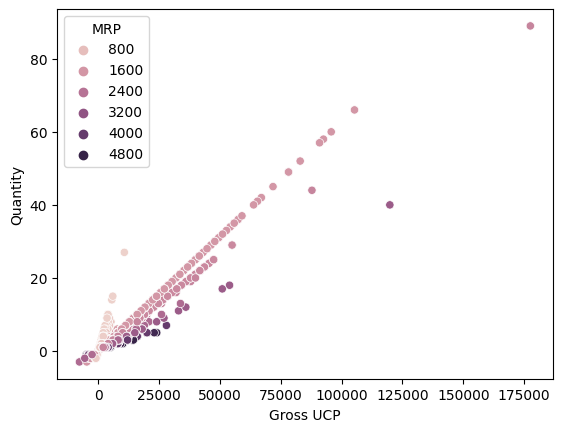

In [ ]:
#BIVARIATE ANALYSIS
sns.scatterplot(data=df_23_24_sales_lfs, x='Gross UCP', y='Quantity', hue='MRP')

<Axes: xlabel='MRP', ylabel='Quantity'>

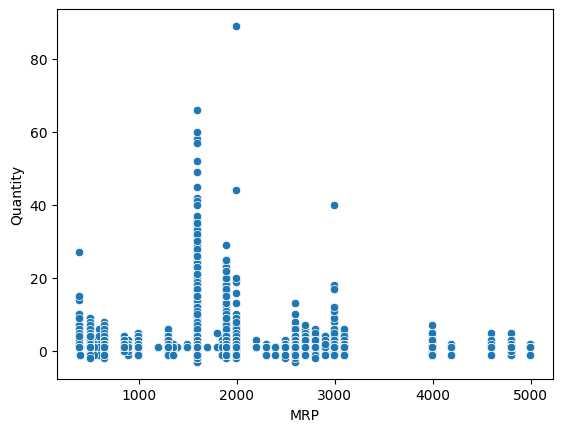

In [ ]:
sns.scatterplot(data=df_23_24_sales_lfs, x='MRP', y='Quantity')

<Axes: xlabel='Gross UCP', ylabel='Quantity'>

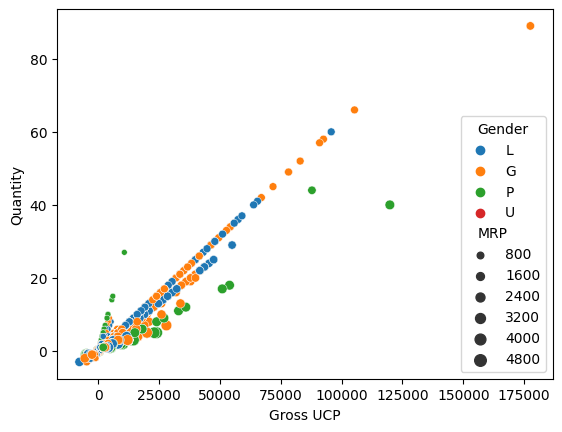

In [ ]:
sns.scatterplot(data=df_23_24_sales_lfs, x='Gross UCP', y='Quantity', size='MRP', hue='Gender')

<Axes: xlabel='Gross UCP', ylabel='Quantity'>

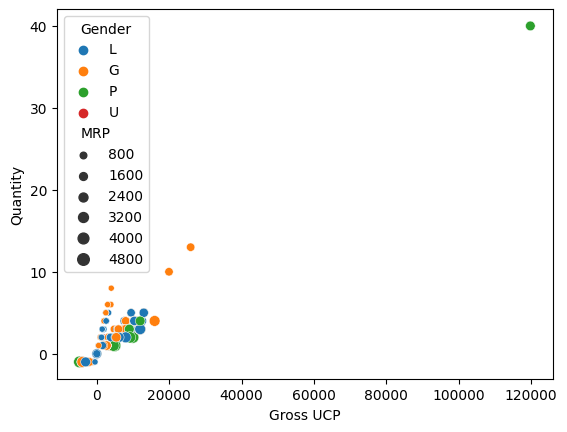

In [ ]:
sns.scatterplot(data=df_23_24_sales_lfs[df_23_24_sales_lfs['Region'] == 'NORTH'], x='Gross UCP', y='Quantity', size='MRP', hue='Gender')

In [ ]:
df_23_24_sales_lfs['Region'].value_counts()

Region
West     46309
South    39364
North    34229
East     31761
NORTH    16354
Name: count, dtype: int64

In [ ]:
df_23_24_sales_lfs['Region'] = df_23_24_sales_lfs['Region'].replace('NORTH', 'North')

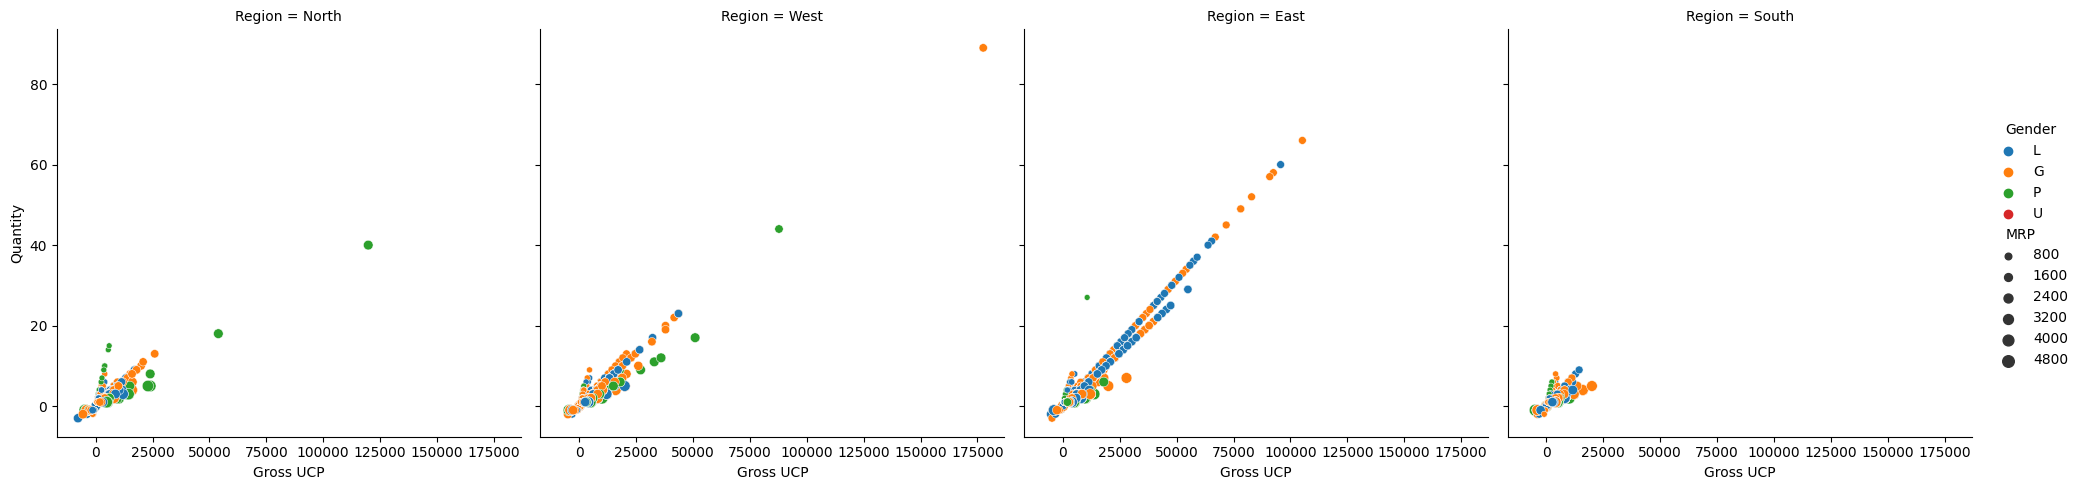

In [ ]:
sns.relplot(data=df_23_24_sales_lfs, x='Gross UCP', y='Quantity', size='MRP', hue='Gender', col='Region', kind='scatter')

In [ ]:
df_23_24_sales_lfs.sample(10)

Year      Month Month Key QTR Region         Invoice Date  \
351988  2023-24 2023-08-01       Aug  Q2  South  2023-08-03 00:00:00   
560085  2023-24 2023-10-01       Oct  Q3   East  2023-10-03 00:00:00   
650139  2023-24 2023-11-01       Nov  Q3  South  2023-11-16 00:00:00   
546548  2023-24 2023-10-01       Oct  Q3   East  2023-10-01 00:00:00   
350838  2023-24 2023-08-01       Aug  Q2   East  2023-08-27 00:00:00   
58198   2023-24 2023-04-01       Apr  Q1  North  2023-04-30 00:00:00   
779438  2023-24 2023-12-01       Dec  Q3   West  2023-12-09 00:00:00   
767054  2023-24 2023-12-01       Dec  Q3   West  2023-12-02 00:00:00   
878263  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-23 00:00:00   
361653  2023-24 2023-08-01       Aug  Q2   West  2023-08-06 00:00:00   

         Material  Quantity Gender Brand  ...         Bill to Party Name  \
351988  NGFM08PC1       1.0      G    TF  ...        My Home - Hyderabad   
560085    FW24PC1       1.0      L    TF  ...  115-SSL-SALT LAKE KOLKATA   
650139   NFM01DQ1       1.0      G    TF  ...             102-SSL-GARUDA   
546548  NEFM13PD1       1.0      G    TF  ...  CT-KOLKATA-METRO EMPORIUM   
350838   NFM01DQ1       2.0      G    TF  ...  CT-KOLKATA-METRO EMPORIUM   
58198   NFFW03PFL       1.0      L    TF  ...     PT-CITY CENTRE-KOLKATA   
779438  NFFW03PFL       1.0      L    TF  ...             272-SSL-PANVEL   
767054   NFM01DQ1       4.0      G    TF  ...         LS C21 Mall Indore   
878263  NFFW04PFC       1.0      L    TF  ...            Runwal - Mulund   
361653    FW17PD1       1.0      L    TF  ...              144-SSL-VASHI   

         MRP Gross UCP  Net UCP  Bill to Party City  ShiptopartyStateCode  \
351988  2695    2695.0  2695.00           Hyderabad             Telangana   
560085  3995    3995.0  3995.00             Kolkata           WEST BENGAL   
650139   499     499.0   499.00           Bangalore             KARNATAKA   
546548   645     645.0   645.00             Kolkata           WEST BENGAL   
350838   499     998.0   998.00             Kolkata           WEST BENGAL   
58198   1895    1895.0  1843.97             KOLKATA            WESTBENGAL   
779438  1895    1895.0  1137.00              Mumbai            MAHARASTRA   
767054   499    1996.0  1996.00              Indore        MADHYA PRADESH   
878263  2595    2595.0  2595.00              Mumbai            MAHARASTRA   
361653   845     845.0   845.00              Mumbai            MAHARASTRA   

        Channel-2 Billing grp         Varient Name2      Collection  
351988        LFS         LFS           100 M CRoad        Escapade  
560085        LFS         LFS          Nox W 100 ml      Nox 100 ml  
650139        LFS         LFS         150 M Raw Deo     Premium Deo  
546548        LFS         LFS            20 M Verge   Classic 20 ml  
350838        LFS         LFS         150 M Raw Deo     Premium Deo  
58198         LFS         LFS             50 W Nude   Classic 50 ml  
779438        LFS         LFS             50 W Nude   Classic 50 ml  
767054        LFS         LFS         150 M Raw Deo     Premium Deo  
878263        LFS         LFS           100 W Sheer  Classic 100 ml  
361653        LFS         LFS  Noura W Floret 20 ml     Noura 20 ml  

[10 rows x 23 columns]

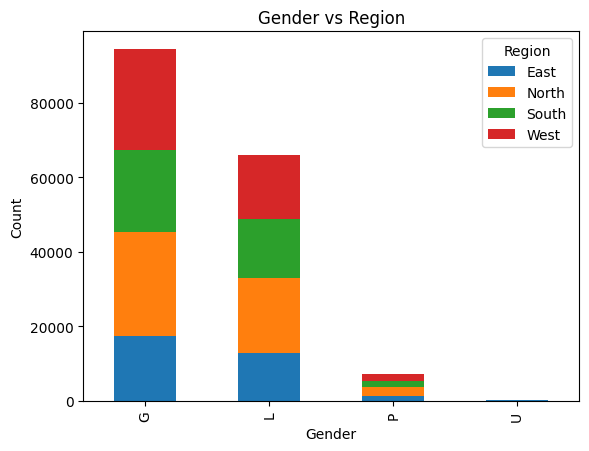

In [ ]:
import matplotlib.pyplot as plt

# Grouping and unstacking the DataFrame
grouped_df = df_23_24_sales_lfs.groupby(['Gender', 'Region']).size().unstack()

# Plotting the grouped DataFrame
grouped_df.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Gender vs Region')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


<Axes: xlabel='Gross UCP', ylabel='Quantity'>

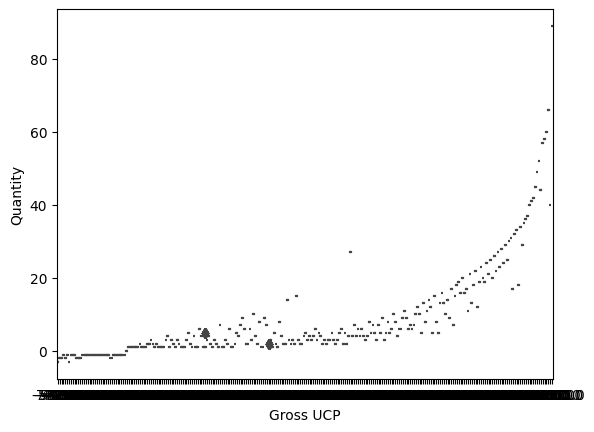

In [ ]:
sns.boxplot(data=df_23_24_sales_lfs, x='Gross UCP', y='Quantity')

<Axes: xlabel='Region', ylabel='Quantity'>

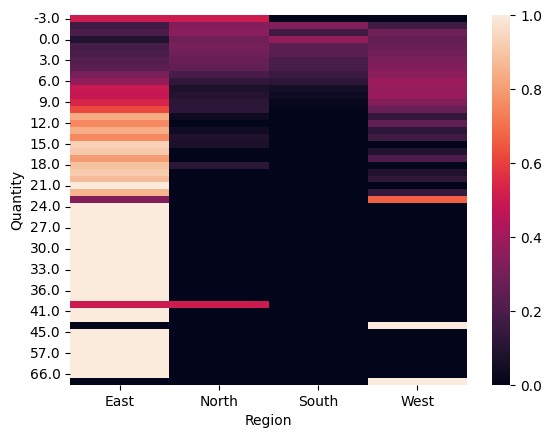

In [ ]:
import pandas as pd
import seaborn as sns

# Create a crosstab with normalization
normalized_crosstab = pd.crosstab(df_23_24_sales_lfs['Quantity'], df_23_24_sales_lfs['Region'], normalize='index')

# Plot heatmap
sns.heatmap(normalized_crosstab)


<Axes: xlabel='Region', ylabel='Gross UCP'>

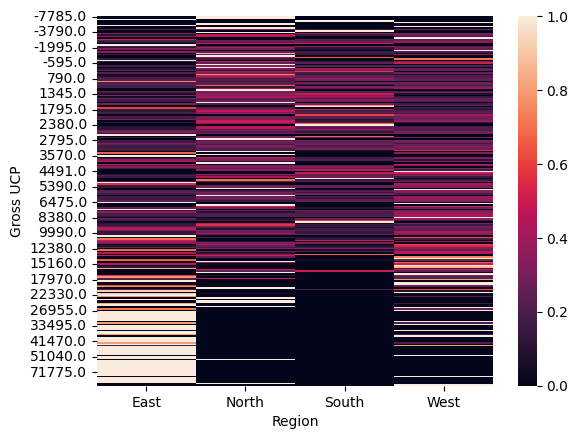

In [ ]:
import pandas as pd
import seaborn as sns

# Create a crosstab with normalization
normalized_crosstab = pd.crosstab(df_23_24_sales_lfs['Gross UCP'], df_23_24_sales_lfs['Region'], normalize='index')

# Plot heatmap
sns.heatmap(normalized_crosstab)


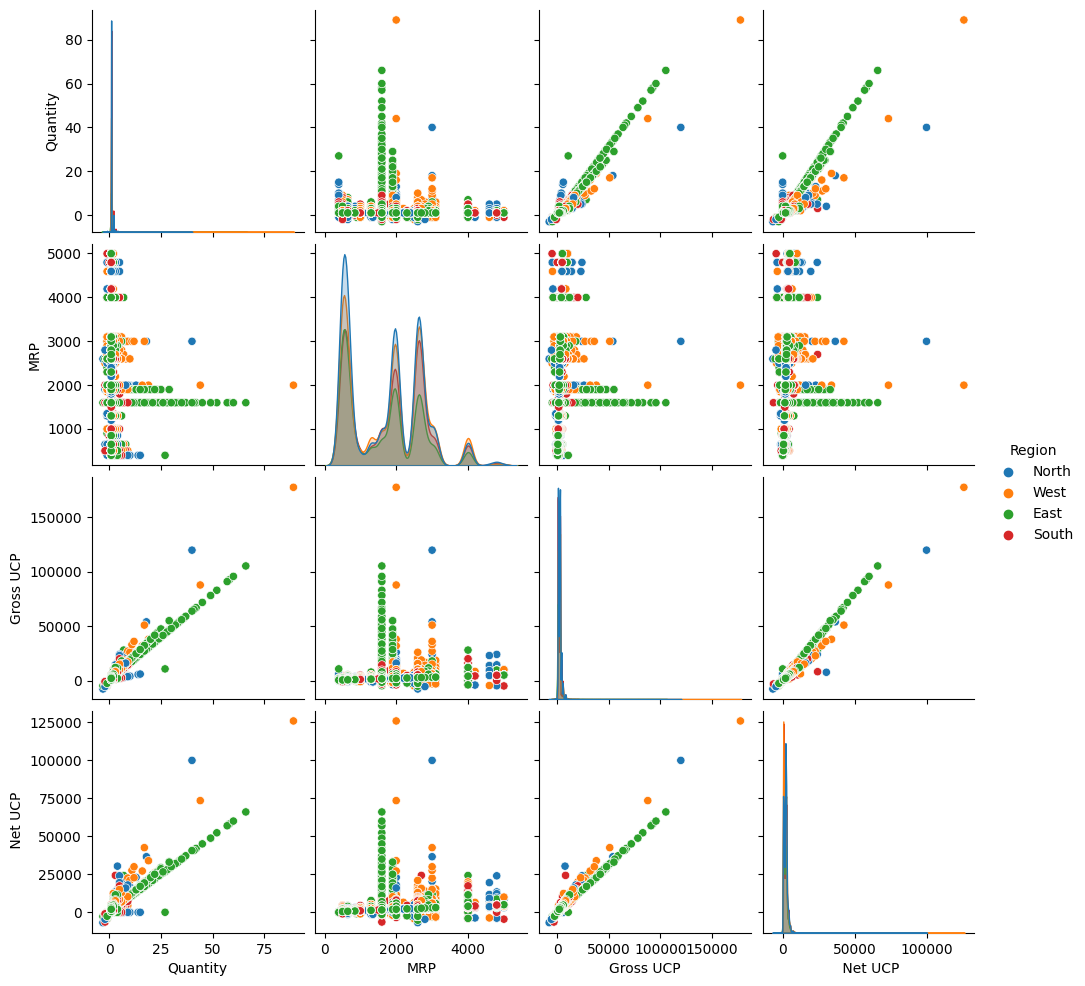

In [ ]:
sns.pairplot(df_23_24_sales_lfs, hue='Region')

In [ ]:
filtered_df = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & (df_23_24_sales_lfs['Month'] == '2023-04-03')]

In [ ]:
df_23_24_dales_lfs_north = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='North')]

df_23_24_dales_lfs_north.head()

Year      Month Month Key QTR Region         Invoice Date  \
42915  2023-24 2023-04-01       Apr  Q1  North  2023-04-20 00:00:00   
42916  2023-24 2023-04-01       Apr  Q1  North  2023-04-21 00:00:00   
42917  2023-24 2023-04-01       Apr  Q1  North  2023-04-20 00:00:00   
42918  2023-24 2023-04-01       Apr  Q1  North  2023-04-27 00:00:00   
42919  2023-24 2023-04-01       Apr  Q1  North  2023-04-22 00:00:00   

        Material  Quantity Gender Brand  ... Bill to Party Name   MRP  \
42915  NFFW14PH1       2.0      L    TF  ...  158-SSL-VIJAYWADA  1595   
42916  NEFM14PK1       1.0      G    TF  ...  158-SSL-VIJAYWADA  2495   
42917    FM20PC1       1.0      L    TF  ...  158-SSL-VIJAYWADA  1595   
42918    FM20PC1       1.0      L    TF  ...  158-SSL-VIJAYWADA  1595   
42919  NEFM02PFC       1.0      G    TF  ...  158-SSL-VIJAYWADA  2295   

      Gross UCP  Net UCP  Bill to Party City  ShiptopartyStateCode  Channel-2  \
42915    3190.0   3190.0          VIJAYAWADA        ANDHRA PRADESH        LFS   
42916    2495.0   1995.0          VIJAYAWADA        ANDHRA PRADESH        LFS   
42917    1595.0   1595.0          VIJAYAWADA        ANDHRA PRADESH        LFS   
42918    1595.0   1595.0          VIJAYAWADA        ANDHRA PRADESH        LFS   
42919    2295.0   2295.0          VIJAYAWADA        ANDHRA PRADESH        LFS   

      Billing grp       Varient Name2      Collection  
42915         LFS        Aqua W 30 ml            Aqua  
42916         LFS        Aqua M 90 ml            Aqua  
42917         LFS  Tales M Rio 100 ml     Tales 100ml  
42918         LFS  Tales M Rio 100 ml     Tales 100ml  
42919         LFS        100 M Steele  Classic 100 ml  

[5 rows x 23 columns]

In [ ]:
unique_months = df_23_24_sales_lfs['Month'].unique()
# unique_months.sort_values(ascending=True)
# print(unique_months)
sorted_unique_months = np.sort(unique_months)
# print(sorted_unique_months)

In [ ]:
df_sales_north = df_23_24_dales_lfs_north.copy()
monthly_quantity = df_sales_north.groupby('Month')['Quantity'].sum().reset_index()

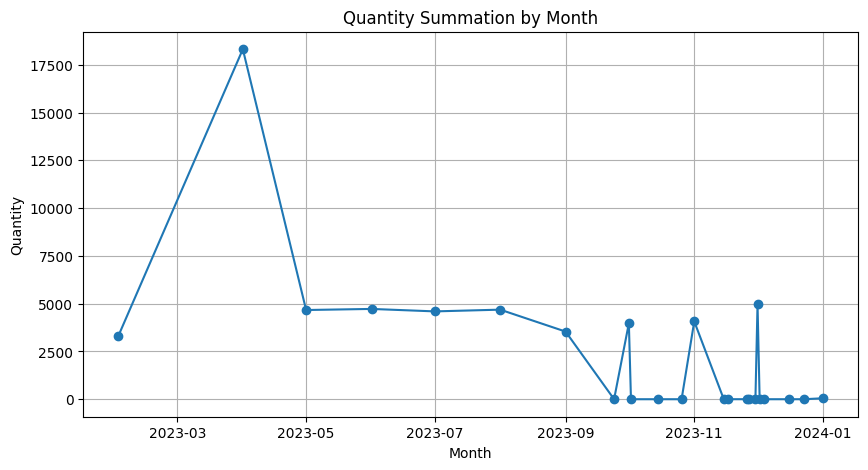

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

In [ ]:
df_sales_north['Quantity'].sum()

56920.0

In [ ]:
df_23_24_dales_lfs_south = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='South')]

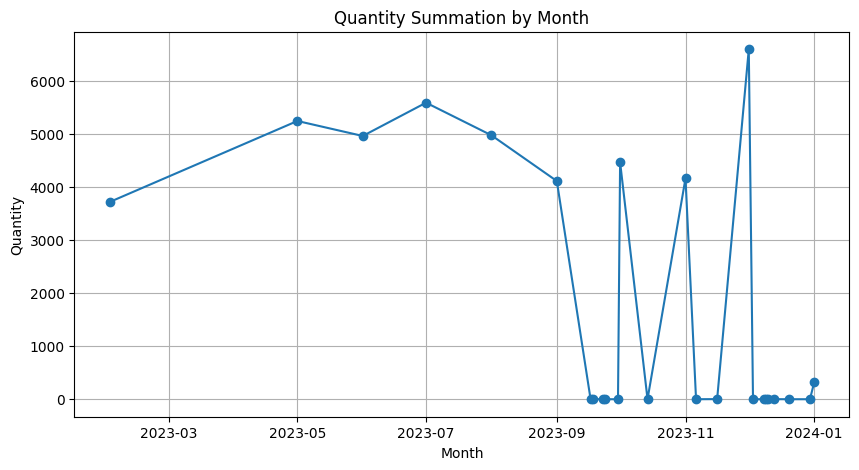

In [ ]:
df_sales_south = df_23_24_dales_lfs_south.copy()
monthly_quantity = df_sales_south.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

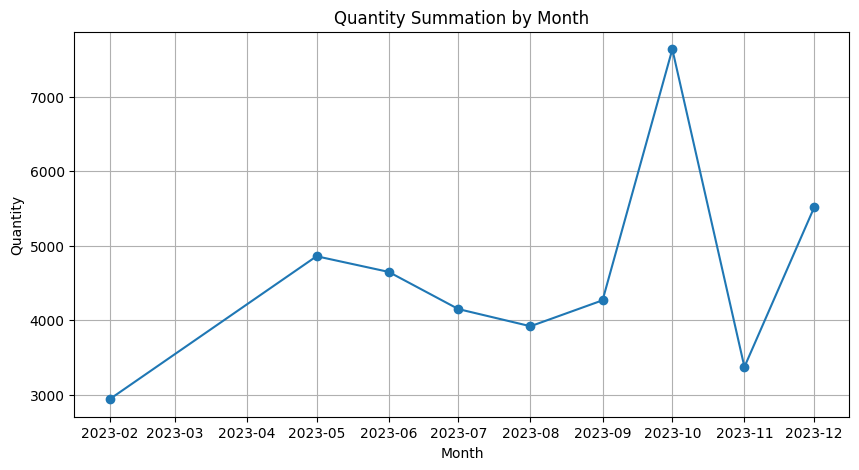

In [ ]:
df_23_24_sales_lfs_east = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='East')]
df_sales_east = df_23_24_sales_lfs_east.copy()
monthly_quantity = df_sales_east.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

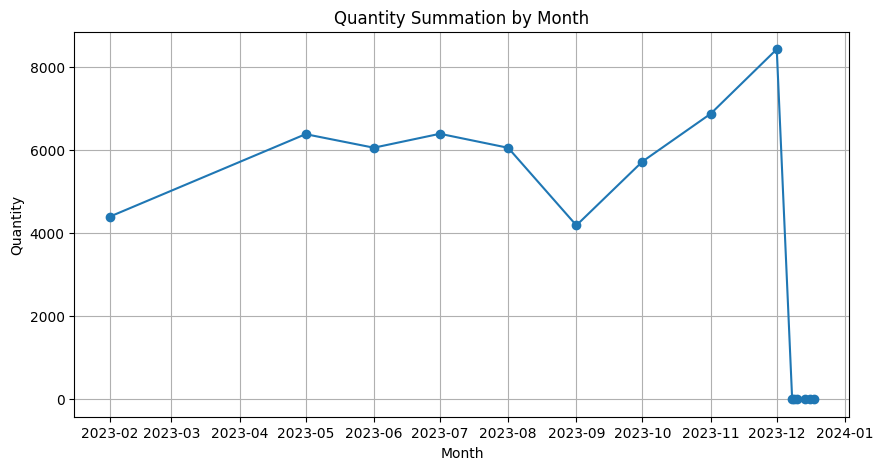

In [ ]:
df_23_24_sales_lfs_west = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='West')]
df_sales_west = df_23_24_sales_lfs_west.copy()
monthly_quantity = df_sales_west.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

In [ ]:
df_23_24_sales_lfs[
    (df_23_24_sales_lfs['Year'] == '2023-24') & 
    (df_23_24_sales_lfs['Region'] == 'North') & (df_23_24_sales_lfs['Month']=='2023-04-01')
]['Quantity'].sum()

18312.0

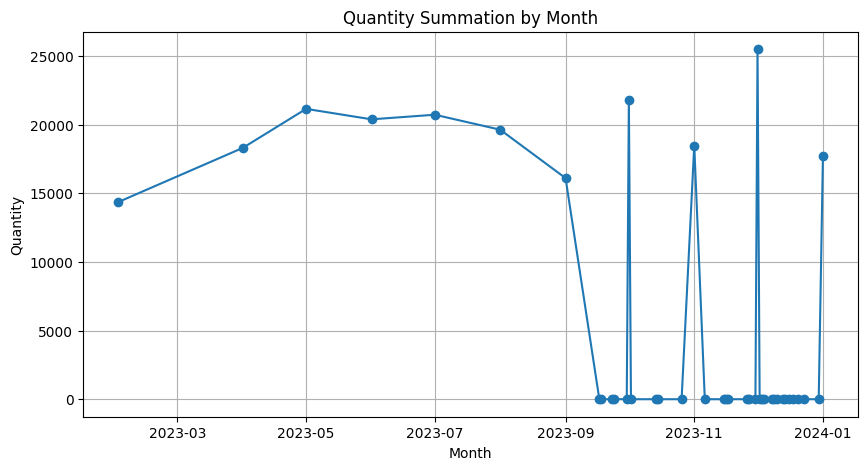

In [ ]:
monthly_quantity = df_23_24_sales_lfs.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

In [ ]:
print(monthly_quantity)

        Month  Quantity
0  2023-02-01   14368.0
1  2023-04-01   18312.0
2  2023-05-01   21153.0
3  2023-06-01   20391.0
4  2023-07-01   20726.0
5  2023-08-01   19635.0
6  2023-09-01   16108.0
7  2023-09-17       2.0
8  2023-09-18       2.0
9  2023-09-23       1.0
10 2023-09-24       2.0
11 2023-09-30       1.0
12 2023-10-01   21801.0
13 2023-10-02       1.0
14 2023-10-14       1.0
15 2023-10-15       1.0
16 2023-10-26       1.0
17 2023-11-01   18481.0
18 2023-11-06       1.0
19 2023-11-15       1.0
20 2023-11-16       3.0
21 2023-11-17       2.0
22 2023-11-26       2.0
23 2023-11-27       2.0
24 2023-11-30       1.0
25 2023-12-01   25498.0
26 2023-12-02       1.0
27 2023-12-03       1.0
28 2023-12-04       1.0
29 2023-12-08       3.0
30 2023-12-09       3.0
31 2023-12-10       3.0
32 2023-12-13       2.0
33 2023-12-14       2.0
34 2023-12-16       2.0
35 2023-12-18       1.0
36 2023-12-20       1.0
37 2023-12-23       1.0
38 2023-12-30       1.0
39 2024-01-01   17694.0


In [ ]:
# Filter the dataframe to keep only the 1st day of each month
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# Display the resulting dataframe
print(monthly_quantity_1st_day)

        Month  Quantity
0  2023-02-01   14368.0
1  2023-04-01   18312.0
2  2023-05-01   21153.0
3  2023-06-01   20391.0
4  2023-07-01   20726.0
5  2023-08-01   19635.0
6  2023-09-01   16108.0
12 2023-10-01   21801.0
17 2023-11-01   18481.0
25 2023-12-01   25498.0
39 2024-01-01   17694.0


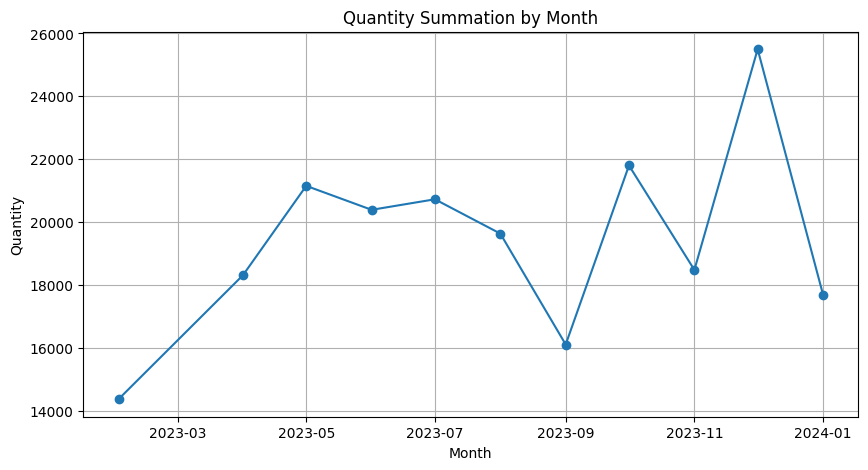

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

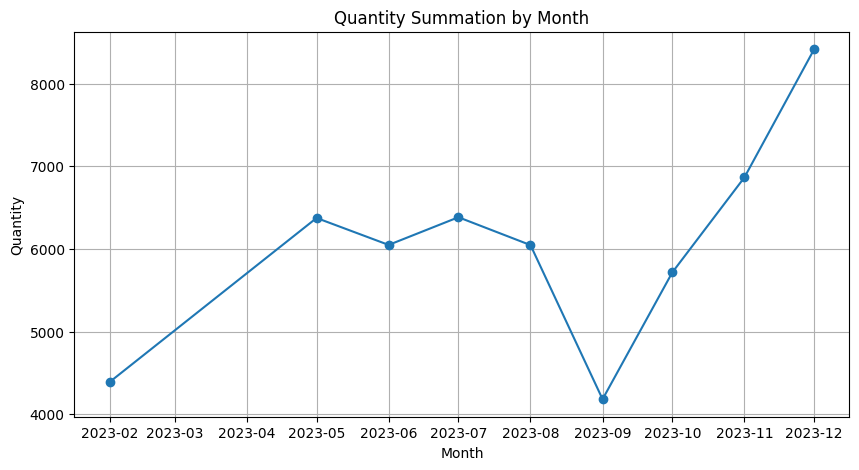

In [ ]:
df_23_24_sales_lfs_west = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='West')]
df_sales_west = df_23_24_sales_lfs_west.copy()
monthly_quantity = df_sales_west.groupby('Month')['Quantity'].sum().reset_index()
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

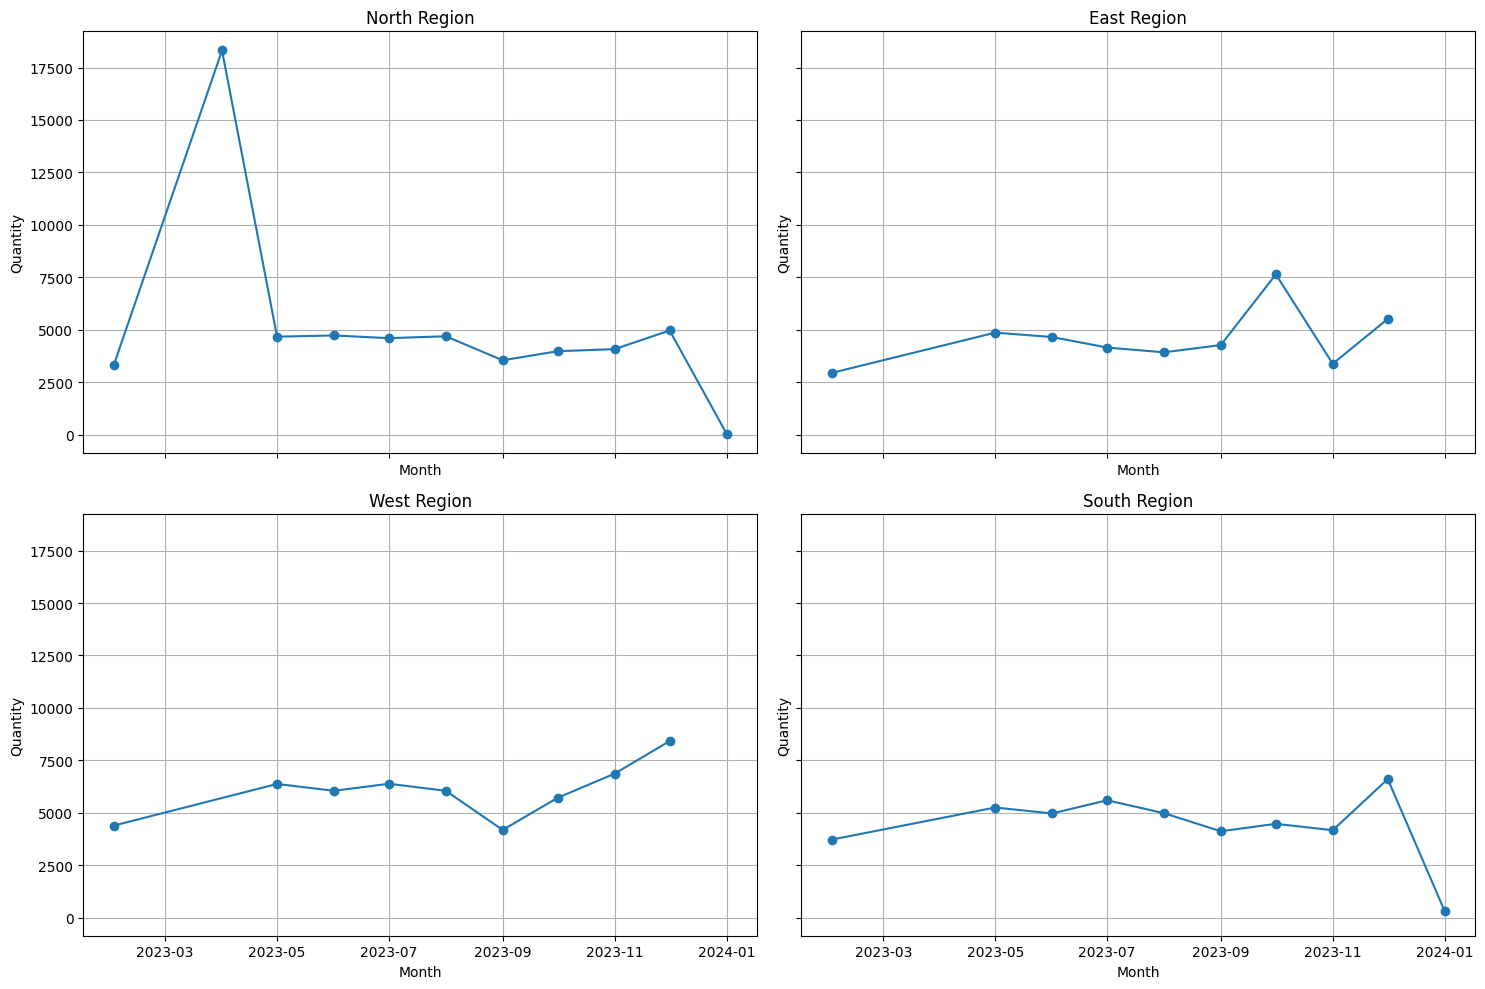

In [ ]:
regions = ["North", "East", "West", "South"]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, region in enumerate(regions):
    df_region = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                   (df_23_24_sales_lfs['Region'] == region)]
    df_sales_region = df_region.copy()
    monthly_quantity = df_sales_region.groupby('Month')['Quantity'].sum().reset_index()
    monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
    
    axs[i].plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o')
    axs[i].set_title(f'{region} Region')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Quantity')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

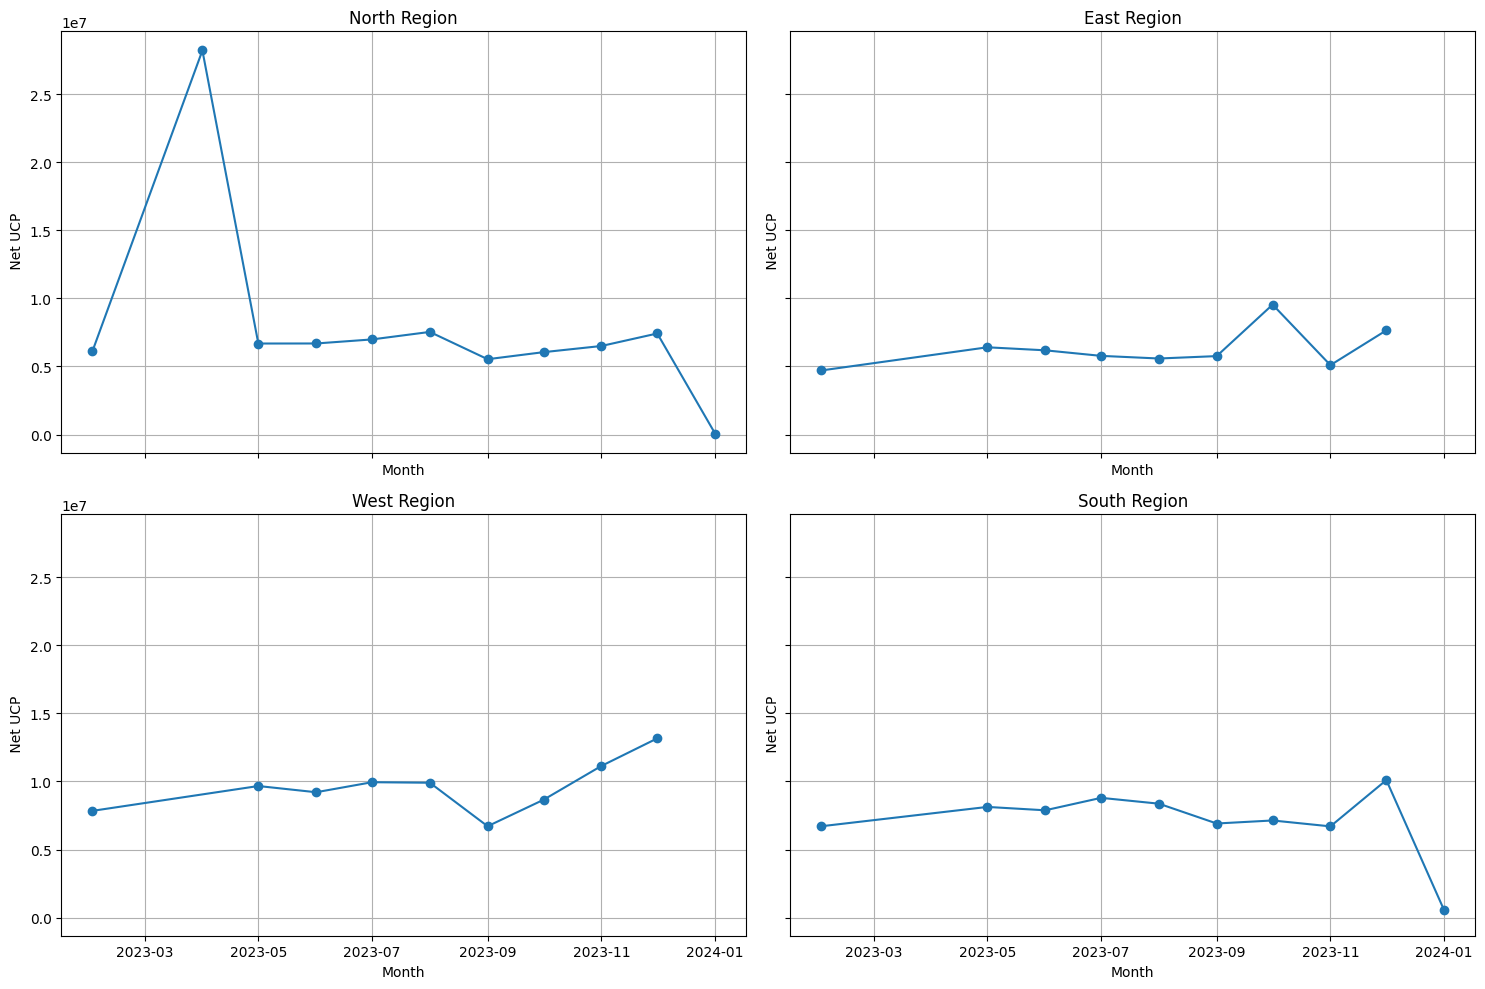

In [ ]:
regions = ["North", "East", "West", "South"]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, region in enumerate(regions):
    df_region = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                   (df_23_24_sales_lfs['Region'] == region)]
    df_sales_region = df_region.copy()
    monthly_ucp = df_sales_region.groupby('Month')[' Net UCP'].sum().reset_index()
    monthly_ucp_1st_day = monthly_ucp[monthly_ucp['Month'].dt.day == 1]
    
    axs[i].plot(monthly_ucp_1st_day['Month'], monthly_ucp_1st_day[' Net UCP'], marker='o')
    axs[i].set_title(f'{region} Region')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel(' Net UCP')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df_23_24_sales_lfs['Collection'].value_counts()

Collection
Gift Pack           29563
Classic 100 ml      29340
 Premium Deo        25533
Classic 20 ml       24062
Classic 50 ml       13982
Aqua                12519
 Escapade Deo       10273
Escapade             9795
Nox 100 ml           6525
 Deo Bundle Pack     6384
Noura W 100ml        4997
Nox 20 ml            2661
Noura 20 ml          2586
Tales 100ml          2521
Classic Flanker      1270
Fastrack              346
Skinn Mist             15
 Bohemian               2
Name: count, dtype: int64

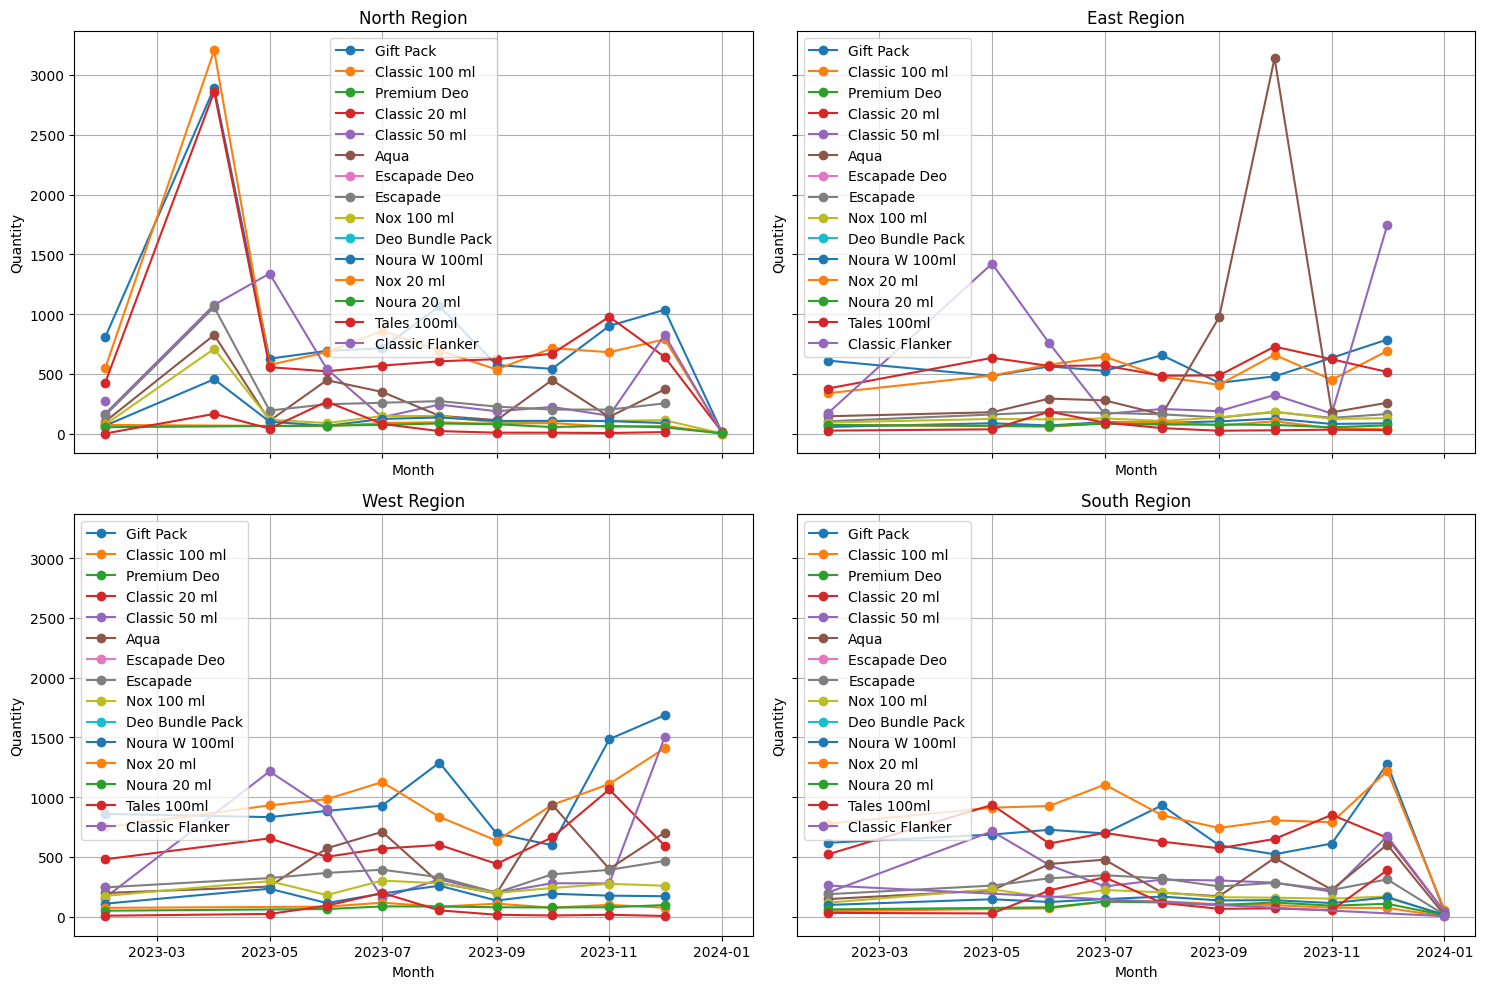

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_23_24_sales_lfs is already defined and loaded with the required data

regions = ["North", "East", "West", "South"]

# Define collections
collections = {
    "Gift Pack": 29563,
    "Classic 100 ml": 29340,
    "Premium Deo": 25533,
    "Classic 20 ml": 24062,
    "Classic 50 ml": 13982,
    "Aqua": 12519,
    "Escapade Deo": 10273,
    "Escapade": 9795,
    "Nox 100 ml": 6525,
    "Deo Bundle Pack": 6384,
    "Noura W 100ml": 4997,
    "Nox 20 ml": 2661,
    "Noura 20 ml": 2586,
    "Tales 100ml": 2521,
    "Classic Flanker": 1270,
    # "Fastrack": 346,
    # "Skinn Mist": 15,
    # "Bohemian": 2
}

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, region in enumerate(regions):
    for collection, value in collections.items():
        df_region = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                       (df_23_24_sales_lfs['Region'] == region) & 
                                       (df_23_24_sales_lfs['Collection'] == collection)]
        df_sales_region = df_region.copy()
        monthly_quantity = df_sales_region.groupby('Month')['Quantity'].sum().reset_index()
        monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
        
        axs[i].plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o', label=collection)
        axs[i].set_title(f'{region} Region')
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel('Quantity')
        axs[i].grid(True)
        axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()
